In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')
from scipy.stats import zscore

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, f1_score,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,accuracy_score, precision_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [4]:
raw_data = pd.read_csv('Train.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507834 entries, 0 to 1507833
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1507834 non-null  object 
 1   region            913743 non-null   object 
 2   tenure            1507834 non-null  object 
 3   Amount            978320 non-null   float64
 4   refill_frequency  978320 non-null   float64
 5   revenue           999713 non-null   float64
 6   arpu_segment      999713 non-null   float64
 7   frequency         999713 non-null   float64
 8   data_volume       766028 non-null   float64
 9   on_net            957192 non-null   float64
 10  Procuct_1         881271 non-null   float64
 11  Procuct_2         604784 non-null   float64
 12  zone1             118986 non-null   float64
 13  zone2             95505 non-null    float64
 14  mrg               1507834 non-null  object 
 15  regularity        1507834 non-null  int64  
 16  

In [5]:
raw_data['Target'].value_counts()

0    1225319
1     282515
Name: Target, dtype: int64

In [6]:
raw_data[(raw_data['Target']==1)&(raw_data['frequency'].notnull())]

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
42,ID_NVPZ41N9WUP2,NaN,K > 24 month,4123.93,22.0,4424.36,1474.79,27.0,25556.0,92.0,129.0,18.0,NaN,0.0,NO,39,Mixt 250F=Unlimited_call24H,15.0,1
46,ID_ICC5DNZWTKTZ,NaN,K > 24 month,1923.08,19.0,1919.23,639.74,20.0,8275.0,NaN,11.0,NaN,NaN,NaN,NO,13,"Data: 100 F=40MB,24H",10.0,1
60,ID_UR8F2UDJ4QHF,NaN,K > 24 month,213.68,1.0,208.97,69.66,3.0,250.0,15.0,5.0,3.0,NaN,NaN,NO,12,NaN,NaN,1
65,ID_RTK7VKVMS3QP,Mandalore,K > 24 month,NaN,NaN,308.97,102.99,4.0,NaN,NaN,6.0,NaN,NaN,NaN,NO,3,NaN,NaN,1
70,ID_X9KFGNXNU8N1,NaN,K > 24 month,277.78,3.0,270.09,90.17,4.0,1221.0,8.0,NaN,NaN,NaN,NaN,NO,4,"Data: 100 F=40MB,24H",3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507692,ID_SQ1LTUDUKNYY,NaN,K > 24 month,NaN,NaN,0.43,0.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
1507724,ID_UQK5FDQBF8J4,NaN,K > 24 month,1623.93,5.0,1624.36,541.45,9.0,NaN,155.0,108.0,1.0,NaN,NaN,NO,14,All-net 500F=2000F;5d,6.0,1
1507748,ID_1CV9ZBN822I2,NaN,K > 24 month,213.68,1.0,218.38,72.65,2.0,0.0,1.0,3.0,NaN,NaN,NaN,NO,4,NaN,NaN,1
1507760,ID_S6RMVPHTY4E0,NaN,K > 24 month,NaN,NaN,42.74,14.10,1.0,44.0,NaN,NaN,NaN,NaN,NaN,NO,22,"Data: 100 F=40MB,24H",1.0,1


In [7]:
raw_data[(raw_data['Target']==1)&(raw_data['frequency'].notnull())].isnull().sum()

ID                      0
region              47644
tenure                  0
Amount              10768
refill_frequency    10768
revenue                 0
arpu_segment            0
frequency               0
data_volume         23841
on_net              21291
Procuct_1           19936
Procuct_2           36045
zone1               49529
zone2               48897
mrg                     0
regularity              0
top_pack            18750
freq_top_pack       18750
Target                  0
dtype: int64

In [8]:
raw_data[raw_data['Target']==1].isnull().sum()

ID                       0
region              266137
tenure                   0
Amount              233555
refill_frequency    233555
revenue             228575
arpu_segment        228575
frequency           228575
data_volume         226619
on_net              232906
Procuct_1           246962
Procuct_2           263999
zone1               277145
zone2               277434
mrg                      0
regularity               0
top_pack            247319
freq_top_pack       247319
Target                   0
dtype: int64

In [9]:
raw_data[raw_data['Target']==0].isnull().sum()

ID                        0
region               327954
tenure                    0
Amount               295959
refill_frequency     295959
revenue              279546
arpu_segment         279546
frequency            279546
data_volume          515187
on_net               317736
Procuct_1            379601
Procuct_2            639051
zone1               1111703
zone2               1134895
mrg                       0
regularity                0
top_pack             384504
freq_top_pack        384504
Target                    0
dtype: int64

In [10]:
raw_data[(raw_data['Target']==0)&(raw_data['frequency'].notnull())].isnull().sum()

ID                       0
region              176027
tenure                   0
Amount               26208
refill_frequency     26208
revenue                  0
arpu_segment             0
frequency                0
data_volume         312893
on_net              100329
Procuct_1           108680
Procuct_2           363465
zone1               835535
zone2               855584
mrg                      0
regularity               0
top_pack            105002
freq_top_pack       105002
Target                   0
dtype: int64

In [11]:
raw_data[raw_data['zone1'].isnull()]['Target'].value_counts()

0    1111703
1     277145
Name: Target, dtype: int64

In [12]:
raw_data[raw_data['Target']==1]['frequency'].nunique()

85

In [13]:
raw_data[raw_data['Target']==1].groupby('region').median()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
region,,,,,,,,,,,,,,
Astral,309.830,1.5,256.195,85.470,2.0,5.0,6.0,8.0,2.0,0.0,0.5,4.0,1.0,1.0
Celestial,299.150,1.0,214.530,71.370,2.0,0.0,6.0,7.0,2.0,0.0,0.0,3.0,1.0,1.0
Droidika,384.620,2.0,341.450,113.680,3.0,73.0,4.0,7.0,3.0,1.0,0.5,3.0,2.0,1.0
Eclipsara,427.350,2.0,427.350,142.310,3.0,17.0,6.0,11.0,2.0,1.0,0.5,4.0,2.0,1.0
Eternum,555.560,3.0,491.455,163.675,2.5,17.0,10.0,36.0,1.0,17.0,NaN,4.5,1.0,1.0
Forcehaven,427.350,2.0,427.350,142.310,2.0,0.0,6.0,13.0,1.0,4.0,NaN,4.0,2.0,1.0
Luminous,256.410,1.0,214.745,71.580,2.0,403.5,4.0,4.0,3.0,0.0,0.0,4.0,1.0,1.0
Mandalore,427.350,2.0,423.080,141.030,3.0,142.0,4.0,9.0,3.0,1.0,1.0,3.0,2.0,1.0
Nebula,427.350,2.0,313.890,104.485,3.0,3.0,6.5,17.0,2.0,0.0,1.0,5.0,2.0,1.0


In [14]:
raw_data[raw_data['Target']==1].groupby('region').mean()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
region,,,,,,,,,,,,,,
Astral,780.870714,3.526786,780.695175,260.264649,4.745614,601.438849,44.389313,32.787879,5.113208,0.857143,0.500000,7.601744,3.387500,1.0
Celestial,525.391843,2.623529,494.240141,164.770813,3.869258,608.706422,45.370492,15.798246,6.859813,1.571429,0.000000,5.603791,2.615764,1.0
Droidika,682.988359,3.352192,663.866623,221.295854,4.696689,1391.334328,40.057746,21.175439,10.810888,1.807018,1.428571,7.155914,3.280534,1.0
Eclipsara,807.830702,4.074468,750.298004,250.107984,5.619342,991.129834,81.874142,27.420213,6.722689,1.916667,1.705882,7.745540,3.828877,1.0
Eternum,1084.815385,4.923077,1060.990714,353.632857,5.428571,1908.666667,33.222222,51.111111,6.333333,17.000000,NaN,8.458333,5.363636,1.0
Forcehaven,974.639348,4.130435,953.828723,317.913617,5.170213,553.515152,165.771429,49.702128,4.500000,4.000000,NaN,7.536842,4.000000,1.0
Luminous,542.090436,2.326877,491.442712,163.829127,3.200472,1105.636054,21.281746,12.666667,8.426829,2.000000,0.500000,7.086957,2.204013,1.0
Mandalore,893.796323,3.786662,803.333949,267.788551,5.222802,1787.348582,38.289738,30.250555,8.358744,8.955285,3.500000,7.372797,3.848329,1.0
Nebula,621.516096,3.101604,596.059949,198.688485,4.444444,783.162963,32.861702,32.109677,18.481481,2.230769,1.375000,7.656997,2.812950,1.0


In [15]:
raw_data.groupby(['region','Target']).mean().reset_index()

,region,Target,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack
0,Astral,0,1952.647858,9.789623,1954.779320,651.598509,12.039659,1163.705185,368.790404,87.262974,20.152919,3.590078,3.859873,38.374776,7.834713
1,Astral,1,780.870714,3.526786,780.695175,260.264649,4.745614,601.438849,44.389313,32.787879,5.113208,0.857143,0.500000,7.601744,3.387500
2,Celestial,0,2039.499753,10.207649,2043.377990,681.131904,12.350682,1320.566570,392.983390,86.599891,22.101173,3.850727,5.551214,39.106561,8.066628
3,Celestial,1,525.391843,2.623529,494.240141,164.770813,3.869258,608.706422,45.370492,15.798246,6.859813,1.571429,0.000000,5.603791,2.615764
4,Droidika,0,2516.656089,11.825018,2524.084747,841.364090,14.463771,3021.760711,334.578658,94.675735,31.707162,5.176373,6.470474,38.406861,9.435441
5,Droidika,1,682.988359,3.352192,663.866623,221.295854,4.696689,1391.334328,40.057746,21.175439,10.810888,1.807018,1.428571,7.155914,3.280534
6,Eclipsara,0,2552.888930,14.041017,2562.465050,854.157034,16.629561,2258.378535,396.273796,100.018839,15.955336,3.649841,3.468494,39.652853,10.839419
7,Eclipsara,1,807.830702,4.074468,750.298004,250.107984,5.619342,991.129834,81.874142,27.420213,6.722689,1.916667,1.705882,7.745540,3.828877
8,Eternum,0,2528.096040,10.483168,2471.024463,823.676930,12.617702,1536.990769,329.119760,148.545090,22.031008,15.508197,6.813559,29.643284,9.188034
9,Eternum,1,1084.815385,4.923077,1060.990714,353.632857,5.428571,1908.666667,33.222222,51.111111,6.333333,17.000000,NaN,8.458333,5.363636


In [16]:
raw_data['Null_Count'] = raw_data.isnull().sum(axis=1)


In [17]:
raw_data[raw_data['Target']==1]['Null_Count'].value_counts()

14    183081
13     26612
12     16265
4      10401
3       9105
5       9091
11      8647
6       6505
7       3396
2       2765
8       2262
9       2222
10      1815
1        338
0         10
Name: Null_Count, dtype: int64

In [18]:
raw_data[raw_data['Target']==0]['Null_Count'].value_counts()

2     294422
3     276781
4     144073
14    109284
13     80156
1      70204
5      69702
12     57241
6      37943
11     32534
7      19739
8       9570
9       8993
0       7537
10      7140
Name: Null_Count, dtype: int64

In [19]:
print(raw_data[raw_data['Target']==1]['top_pack'].nunique())
print(raw_data[raw_data['Target']==0]['top_pack'].nunique())

96
127


In [20]:
# Assuming your DataFrame is named raw_data
# Replace this with your actual DataFrame

# Filter rows based on conditions
filtered_data = raw_data[(raw_data['Target'] == 1) | (raw_data['Null_Count'] < 13)]

# Display the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", filtered_data.shape)



Shape of the filtered DataFrame: (1318394, 20)


In [21]:
filtered_data['Target'].value_counts()

0    1035879
1     282515
Name: Target, dtype: int64

In [22]:
print(filtered_data[filtered_data['Target']==1]['top_pack'].nunique())
print(filtered_data[filtered_data['Target']==0]['top_pack'].nunique())

96
127


In [23]:
unique_top_packs_target_1 = filtered_data[filtered_data['Target'] == 1]['top_pack'].unique()

# Create a new binary feature based on whether 'top_pack' is in the list
filtered_data['top_pack_in_target_1'] = filtered_data['top_pack'].isin(unique_top_packs_target_1).astype(int)

# Display the DataFrame with the new feature
print(filtered_data.head())

                ID     region        tenure   Amount  refill_frequency  \
1  ID_Z9IQ9QH52KVN     Nebula  K > 24 month  4764.96              41.0   
2  ID_YZSU7B7M35QS  Celestial  K > 24 month  5769.23              22.0   
4  ID_8IYIC9PFU8U1  Eclipsara  K > 24 month  5341.88              58.0   
5  ID_MJFIYBIBY0JO  Celestial  K > 24 month    42.74               1.0   
7  ID_BY33YU074XLI  Eclipsara  K > 24 month  2564.10              12.0   

   revenue  arpu_segment  frequency  data_volume  on_net  ...  Procuct_2  \
1  4756.84       1585.47       41.0          2.0   626.0  ...        NaN   
2  5769.23       1923.08       22.0      28121.0     0.0  ...        1.0   
4  5636.75       1879.06       60.0       1131.0   546.0  ...        0.0   
5    42.74         14.10        2.0          4.0     3.0  ...        NaN   
7  2777.78        926.07       13.0          NaN    96.0  ...        1.0   

   zone1  zone2  mrg regularity                              top_pack  \
1    NaN    NaN   NO     

In [24]:
unique_top_packs_target_0 = filtered_data[filtered_data['Target'] == 0]['top_pack'].unique()

# Create a new binary feature based on whether 'top_pack' is in the list
filtered_data['top_pack_in_target_0'] = filtered_data['top_pack'].isin(unique_top_packs_target_0).astype(int)

In [25]:
difference_top_packs = set(unique_top_packs_target_0) - set(unique_top_packs_target_1)
print("Difference in 'top_pack' values between Target=0 and Target=1:", len(difference_top_packs))

Difference in 'top_pack' values between Target=0 and Target=1: 34


In [26]:
filtered_data['top_pack_in_target_1'].value_counts()

1    1318059
0        335
Name: top_pack_in_target_1, dtype: int64

In [27]:
filtered_data[filtered_data['top_pack_in_target_1']==1]['Target'].value_counts()

0    1035544
1     282515
Name: Target, dtype: int64

In [28]:
filtered_data['top_pack_in_target_0'].value_counts()

1    1318391
0          3
Name: top_pack_in_target_0, dtype: int64

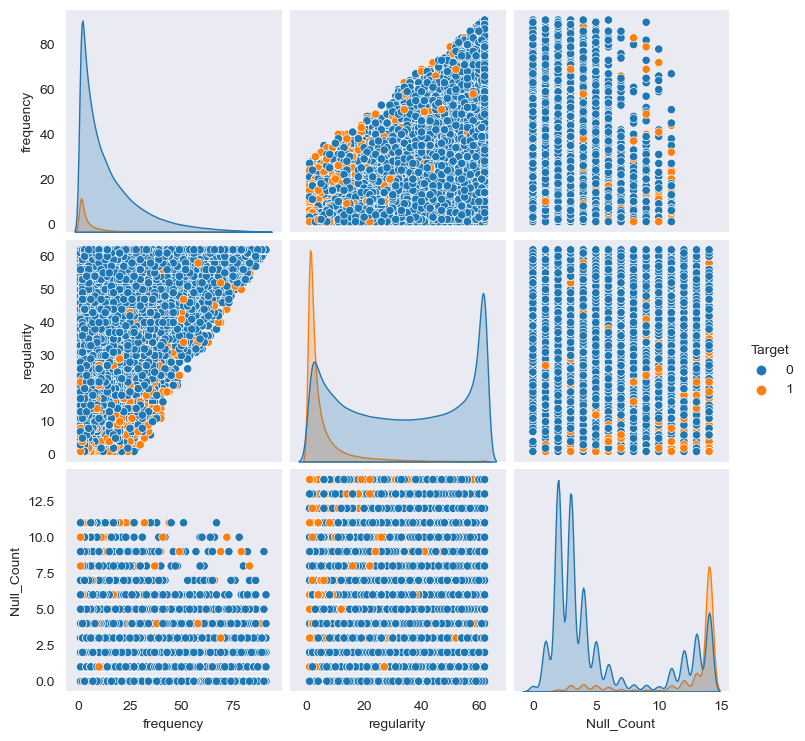

In [31]:
sns.pairplot(data=raw_data,hue='Target',vars=['frequency','regularity','Null_Count'])

In [29]:
raw_data[raw_data['Target']==1].groupby(['regularity','region']).median().reset_index()

,regularity,region,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,freq_top_pack,Target,Null_Count
0,1,Astral,213.680,1.0,216.240,72.01,2.0,2.5,5.5,13.0,1.5,NaN,NaN,1.0,1.0,13.0
1,1,Celestial,213.680,1.0,209.400,69.66,1.0,0.0,2.0,2.0,2.5,2.0,0.0,1.0,1.0,13.0
2,1,Droidika,213.680,1.0,213.680,71.37,1.0,2.0,0.0,4.0,2.0,0.5,NaN,1.0,1.0,13.0
3,1,Eclipsara,213.680,1.0,213.680,71.37,2.0,0.0,3.5,10.0,4.0,1.0,6.5,1.0,1.0,13.0
4,1,Eternum,149.575,1.0,247.440,82.48,2.0,34.0,8.0,17.0,NaN,NaN,NaN,1.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,62,Eclipsara,13440.170,51.0,14082.050,4694.02,53.0,4478.0,766.0,502.0,14.0,NaN,23.0,47.0,1.0,1.0
594,62,Luminous,42.740,1.0,35.040,11.54,2.0,193.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,9.5
595,62,Mandalore,5833.335,28.5,5899.145,1966.24,33.0,8807.0,50.5,60.0,9.0,1.0,8.5,17.5,1.0,2.0
596,62,Quasar,1111.110,5.0,1314.100,438.03,6.0,7278.0,0.0,32.0,NaN,NaN,NaN,3.0,1.0,3.0


In [30]:
raw_data[raw_data['Target']==1]['frequency'].value_counts()

1.0     18731
2.0      8356
3.0      5254
4.0      3770
5.0      2840
        ...  
77.0        1
83.0        1
84.0        1
87.0        1
81.0        1
Name: frequency, Length: 85, dtype: int64

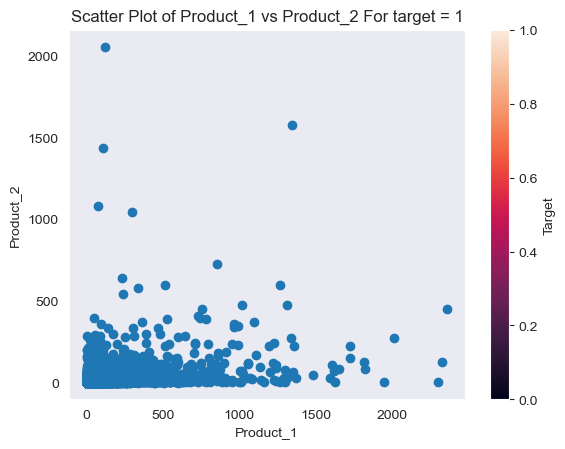

In [34]:
# Scatter plot
plt.scatter(x=raw_data[raw_data['Target']==1]['Procuct_1'], y=raw_data[raw_data['Target']==1]['Procuct_2'])
plt.xlabel('Product_1')
plt.ylabel('Product_2')
plt.title('Scatter Plot of Product_1 vs Product_2 For target = 1')
plt.colorbar(label='Target')
plt.show()

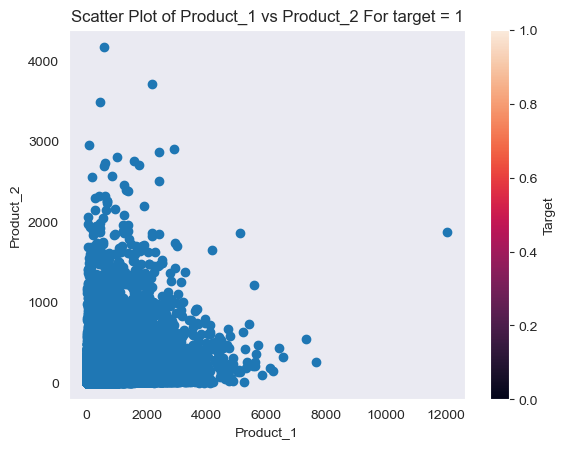

In [35]:
# Scatter plot
plt.scatter(x=raw_data[raw_data['Target']==0]['Procuct_1'], y=raw_data[raw_data['Target']==0]['Procuct_2'])
plt.xlabel('Product_1')
plt.ylabel('Product_2')
plt.title('Scatter Plot of Product_1 vs Product_2 For target = 1')
plt.colorbar(label='Target')
plt.show()

In [31]:
# Assuming your DataFrame is named raw_data
# Replace this with your actual DataFrame

# Display unique values and their counts for 'Product_1'
print(raw_data['Procuct_1'].value_counts())

# Display unique values and their counts for 'Product_2'
print(raw_data['Procuct_2'].value_counts())


1.0       48403
0.0       43321
2.0       34464
3.0       25340
4.0       23732
          ...  
1887.0        1
2102.0        1
3429.0        1
2743.0        1
2364.0        1
Name: Procuct_1, Length: 2875, dtype: int64
1.0       78461
0.0       65807
2.0       50723
3.0       37156
4.0       30119
          ...  
844.0         1
816.0         1
2450.0        1
1311.0        1
1340.0        1
Name: Procuct_2, Length: 1185, dtype: int64


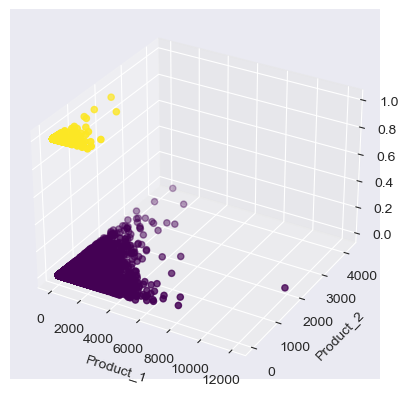

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming your DataFrame is named raw_data
# Replace this with your actual DataFrame

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(raw_data['Procuct_1'], raw_data['Procuct_2'], raw_data['Target'], c=raw_data['Target'], cmap='viridis')

# Set labels
ax.set_xlabel('Product_1')
ax.set_ylabel('Product_2')
ax.set_zlabel('Target')

# Show the plot
plt.show()


In [32]:
raw_data[raw_data['Target']==1].groupby('Procuct_1').agg({'Procuct_2':'median'})

,Procuct_2
Procuct_1,
0.0,1.0
1.0,1.0
2.0,2.0
3.0,2.0
4.0,2.0
...,...
1948.0,6.0
2014.0,274.0
2301.0,4.0


In [33]:
filtered_data[filtered_data['Null_Count']==13].isnull().sum()

ID                          0
region                  20007
tenure                      0
Amount                  26612
refill_frequency        26612
revenue                 26612
arpu_segment            26612
frequency               26612
data_volume             12660
on_net                  21184
Procuct_1               26349
Procuct_2               26579
zone1                   26287
zone2                   26606
mrg                         0
regularity                  0
top_pack                26612
freq_top_pack           26612
Target                      0
Null_Count                  0
top_pack_in_target_1        0
top_pack_in_target_0        0
dtype: int64

In [34]:
filtered_data[filtered_data['Null_Count']==12]['Target'].value_counts()

0    57241
1    16265
Name: Target, dtype: int64

In [35]:
raw_data[raw_data['Null_Count']==13]['Target'].value_counts()

0    80156
1    26612
Name: Target, dtype: int64

In [108]:
test_data = pd.read_csv('Test.csv')
test_data['Null_Count'] = test_data.isnull().sum(axis=1)
test_data['Null_Count'].value_counts()

2     74995
14    73530
3     72413
4     38922
13    26688
5     20107
12    18227
1     17724
6     11240
11    10587
7      5890
8      2879
9      2796
10     2203
0      1926
Name: Null_Count, dtype: int64

In [110]:
raw_df = raw_data.copy().set_index('ID')
tenuremap = {
    'K > 24 month': 24,
    'I 18-21 month': (18 + 21) / 2,
    'H 15-18 month': (15 + 18) / 2,
    'G 12-15 month': (12 + 15) / 2,
    'J 21-24 month': (21 + 24) / 2,
    'F 9-12 month': (9 + 12) / 2,
    'E 6-9 month': (6 + 9) / 2,
    'D 3-6 month': (3 + 6) / 2,
}
raw_df['tenure'] = raw_df['tenure'].map(tenuremap)
raw_df.drop(columns=['mrg','top_pack'],inplace=True)
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,NaN,NaN,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,NaN,NaN,61,NaN,0,5
ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,NaN,NaN,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,NaN,NaN,NaN,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,48.0,NaN,NaN,40,10.0,0,3


In [38]:
target = raw_df['Target']
target

ID
ID_YEB05X4KUGPQ    0
ID_Z9IQ9QH52KVN    0
ID_YZSU7B7M35QS    0
ID_QS4F5LEX29KM    0
ID_8IYIC9PFU8U1    0
                  ..
ID_D1MA2025F1U6    0
ID_9H6BGU1FS1CD    0
ID_QWJPIJ065LA4    0
ID_B0S6HQUEDWJ7    0
ID_T7DN0N7KLS2R    1
Name: Target, Length: 1507834, dtype: int64

In [39]:
encoded_df = pd.get_dummies(raw_df.drop(columns='Target'))
encoded_df

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Eternum,region_Forcehaven,region_Luminous,region_Mandalore,region_Nebula,region_Nebulith,region_Quasar,region_Radiantara,region_Stellaris,region_Zodiacalia
ID,,,,,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
ID_Z9IQ9QH52KVN,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,NaN,...,0,0,0,0,1,0,0,0,0,0
ID_YZSU7B7M35QS,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
ID_QS4F5LEX29KM,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
ID_8IYIC9PFU8U1,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,...,0,0,0,0,0,0,0,0,0,0
ID_9H6BGU1FS1CD,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
ID_QWJPIJ065LA4,24.0,1923.08,9.0,2136.75,712.39,10.0,NaN,34.0,74.0,48.0,...,0,0,1,0,0,0,0,0,0,0


##### I want to build a basic XGB model with the missing values so I can experiment on 2 fronts:
- 1. Does the accuracy go down drastically and if so what is the submission score
- 2. What are the most important features of the model so that I can create a fillna() strategy around that

##### My best previous was built on a simple fillna(df'groupby('tenure).median()) strategy however the most important feature of that model were
- frequency
- Procuct_1
- Regularity
##### This was however achieved after dropping a lot of columns, feature engineering & removing highly correlated features

##### My plan now is to best the model using a backward propalgation strategy:
- Build the model using the raw_data as is (first without preprocessing, second with outlier clipping & scaling)
- extracting the most important features and filling using the top 3 (if the same as the list above)
- then implementing a more advanced technique if improvement on the score are seen

In [40]:
features = encoded_df.iloc[:,0:15]

First I need to balance the target variable. First iteration using undersampling then the final iteration will be oversampling using SMOTE method


In [41]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled  = rus.fit_resample(encoded_df,target)
print(y_resampled.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=0)

0    282515
1    282515
Name: Target, dtype: int64


In [42]:
X_train

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Eternum,region_Forcehaven,region_Luminous,region_Mandalore,region_Nebula,region_Nebulith,region_Quasar,region_Radiantara,region_Stellaris,region_Zodiacalia
316363,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
210344,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
193167,24.0,1965.81,7.0,2136.75,712.39,9.0,1822.0,55.0,109.0,12.0,...,0,0,0,1,0,0,0,0,0,0
560505,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
303163,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
152315,24.0,NaN,NaN,NaN,NaN,NaN,165.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
117952,24.0,555.56,3.0,773.08,257.69,7.0,2212.0,1.0,NaN,25.0,...,0,0,0,0,0,0,0,0,0,0
435829,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_train

316363    1
210344    0
193167    0
560505    1
303163    1
         ..
359783    1
152315    0
117952    0
435829    1
305711    1
Name: Target, Length: 452024, dtype: int64

In [44]:
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss',        # use logloss as the evaluation metric
    random_state=0
)

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print('___________________________')
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
print("XGBoost Metrics:")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {auc_roc_xgb:.4f}\n")
print('________________________________________________________')

Accuracy: 0.8675026104808594
Confusion Matrix:
[[45763 10540]
 [ 4433 52270]]
___________________________
F1 Score: 0.8747165580313438
___________________________
XGBoost Metrics:
Precision: 0.8322
Recall: 0.9218
F1 Score: 0.8747
AUC-ROC: 0.9314

________________________________________________________


Feature ranking:
regularity: 0.13283221423625946
Null_Count: 0.1174497902393341
region_Mandalore: 0.09660236537456512
region_Droidika: 0.08714368939399719
region_Celestial: 0.08129225671291351
region_Eclipsara: 0.07520166039466858
region_Luminous: 0.0655195415019989
region_Stellaris: 0.05907799303531647
region_Zodiacalia: 0.056135986000299454
region_Nebula: 0.041793156415224075
region_Astral: 0.04100334271788597
region_Nebulith: 0.03869741037487984
region_Quasar: 0.03738519549369812
region_Radiantara: 0.03416365757584572
region_Forcehaven: 0.006817053072154522
data_volume: 0.004679822362959385
arpu_segment: 0.003350612008944154
region_Eternum: 0.0031933565624058247
zone1: 0.002671761205419898
zone2: 0.0026633564848452806
Amount: 0.002435521222651005
Procuct_2: 0.0015725940465927124
revenue: 0.0014145986642688513
refill_frequency: 0.0013492968864738941
frequency: 0.0013469450641423464
on_net: 0.0012155920267105103
Procuct_1: 0.001060596783645451
freq_top_pack: 0.0010314086684957147
tenu

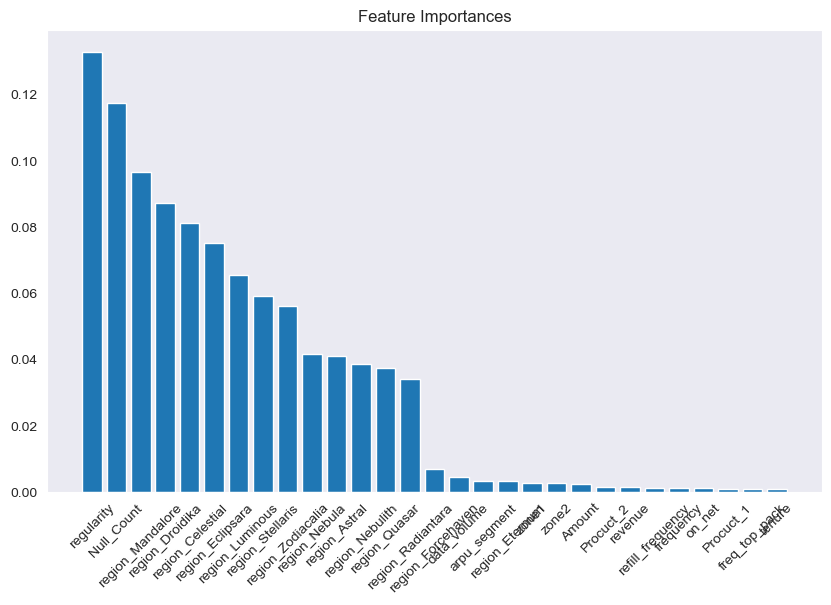

In [69]:
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [72]:
X_train

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Eternum,region_Forcehaven,region_Luminous,region_Mandalore,region_Nebula,region_Nebulith,region_Quasar,region_Radiantara,region_Stellaris,region_Zodiacalia
316363,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
210344,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
193167,24.0,1965.81,7.0,2136.75,712.39,9.0,1822.0,55.0,109.0,12.0,...,0,0,0,1,0,0,0,0,0,0
560505,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
303163,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
152315,24.0,NaN,NaN,NaN,NaN,NaN,165.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
117952,24.0,555.56,3.0,773.08,257.69,7.0,2212.0,1.0,NaN,25.0,...,0,0,0,0,0,0,0,0,0,0
435829,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test_data = test_data.drop(columns=['mrg','top_pack']).set_index('ID')
test_data['tenure'] = test_data['tenure'].map(tenuremap)
test_data = pd.get_dummies(test_data)
test_data

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Eternum,region_Forcehaven,region_Luminous,region_Mandalore,region_Nebula,region_Nebulith,region_Quasar,region_Radiantara,region_Stellaris,region_Zodiacalia
ID,,,,,,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,...,0,0,0,0,0,0,0,0,0,0
ID_04KNWHGV5783,24.0,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,...,0,0,1,0,0,0,0,0,0,0
ID_CXS07G6VLB2U,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,...,0,0,0,0,0,0,0,0,0,0
ID_N3NFJJVHS25K,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,...,0,0,0,0,0,0,0,0,0,0
ID_R36J4ROT93E9,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,...,0,0,0,0,0,0,0,0,1,0
ID_XGDT520DFBLP,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,...,0,0,0,0,0,0,0,0,0,0
ID_9RDB792PB5Q4,24.0,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,...,0,0,0,1,0,0,0,0,0,0


In [74]:
final_pred = model_xgb.predict(test_data)
final_pred
data = list(zip(test_data.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
result_df.to_csv('Submission3.0.1.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            0
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            1
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            0
380126  ID_2F6Y446GS8T3            1

[380127 rows x 2 columns]


In [75]:
result_df['Predictions'].value_counts()

0    257211
1    122916
Name: Predictions, dtype: int64

In [76]:
initial_pred = pd.read_csv('Submission.csv')
initial_pred['Predictions'].value_counts()

0    323794
1     56333
Name: Predictions, dtype: int64

In [80]:
raw_data[raw_data.region.notnull()].Null_Count.value_counts()

2     282527
3     228801
4      99430
1      68923
13     65117
5      42359
12     40512
11     26256
6      23535
7      12618
0       7547
9       5709
8       5406
10      5003
Name: Null_Count, dtype: int64

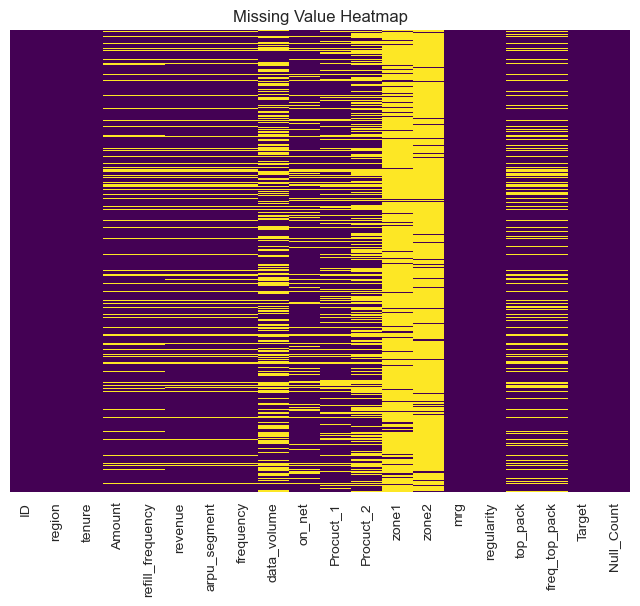

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(raw_data[raw_data.region.notnull()].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

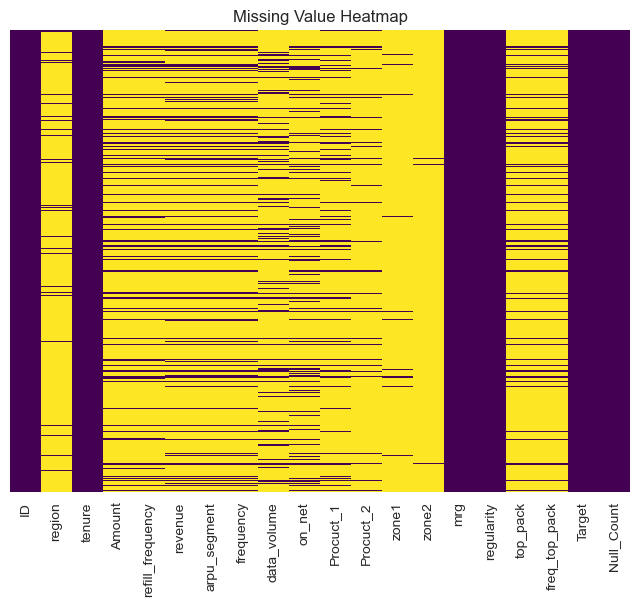

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(raw_data[raw_data.Target == 1].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [48]:
raw_data[raw_data.Target == 1]['region'].value_counts()

Mandalore     6867
Droidika      2046
Stellaris     1602
Luminous      1311
Celestial     1108
Eclipsara     1065
Nebula         586
Radiantara     416
Quasar         404
Astral         344
Nebulith       290
Zodiacalia     220
Forcehaven      95
Eternum         24
Name: region, dtype: int64

In [46]:
raw_data[raw_data.region.notnull()]['Target'].value_counts()

0    897365
1     16378
Name: Target, dtype: int64

In [47]:
raw_data[raw_data['Target']==1].groupby('Null_Count').median()

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target
Null_Count,,,,,,,,,,,,,,
0,2927.35,14.0,3025.430,1008.550,22.0,292.5,36.0,52.5,6.5,2.0,1.0,31.5,6.5,1.0
1,2670.94,12.0,2753.205,917.735,16.0,1432.0,15.5,35.5,4.0,1.0,2.0,30.0,6.0,1.0
2,1752.14,8.0,1846.580,615.380,11.0,1109.0,14.0,23.0,4.0,1.0,2.0,24.0,4.0,1.0
3,1068.38,5.0,1111.540,370.510,7.0,814.0,11.0,17.0,4.0,2.0,2.0,18.0,3.0,1.0
4,641.03,3.0,641.030,213.680,4.0,616.0,8.0,11.0,3.0,2.0,2.0,12.0,2.0,1.0
5,427.35,2.0,423.080,141.030,2.0,696.0,6.0,7.0,1.0,1.0,2.0,9.0,1.0,1.0
6,213.68,1.0,213.680,71.370,2.0,229.0,4.0,3.0,2.0,1.0,2.0,6.0,1.0,1.0
7,213.68,1.0,205.770,68.590,2.0,2.5,2.0,2.0,1.0,1.0,2.0,5.0,1.0,1.0
8,213.68,1.0,106.840,35.470,1.0,17.5,2.0,2.0,1.0,1.0,2.0,4.0,1.0,1.0


In [101]:
raw_data[raw_data.region.isnull()].notnull().sum()

ID                  594091
region                   0
tenure              594091
Amount              213017
refill_frequency    213017
revenue             223671
arpu_segment        223671
frequency           223671
data_volume         197713
on_net              208762
Procuct_1           173040
Procuct_2           103936
zone1                24019
zone2                23668
mrg                 594091
regularity          594091
top_pack            175147
freq_top_pack       175147
Target              594091
Null_Count          594091
dtype: int64

In [50]:
raw_df[(raw_df['Target'] == 0)&(raw_df.region.notnull())].isnull().sum()

region                   0
tenure                   0
Amount              138022
refill_frequency    138022
revenue             127619
arpu_segment        127619
frequency           127619
data_volume         334261
on_net              154796
Procuct_1           193989
Procuct_2           398847
zone1               802944
zone2               825858
regularity               0
freq_top_pack       200839
Target                   0
Null_Count               0
dtype: int64

In [112]:
region_med_0 = raw_df[raw_df['Target'] == 0].groupby('region')
raw_df[(raw_df['Target'] == 0)&(raw_df.region.notnull())] = raw_df[(raw_df['Target'] == 0)&(raw_df.region.notnull())].fillna(region_med_0.transform('median'))
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [113]:
region_med_1 = raw_df[raw_df['Target'] == 1].groupby('region')
raw_df[(raw_df['Target'] == 1)&(raw_df.region.notnull())] = raw_df[(raw_df['Target'] == 1)&(raw_df.region.notnull())].fillna(region_med_1.transform('median'))
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [114]:
raw_data.isnull().sum()

ID                        0
region               594091
tenure                    0
Amount               529514
refill_frequency     529514
revenue              508121
arpu_segment         508121
frequency            508121
data_volume          741806
on_net               550642
Procuct_1            626563
Procuct_2            903050
zone1               1388848
zone2               1412329
mrg                       0
regularity                0
top_pack             631823
freq_top_pack        631823
Target                    0
Null_Count                0
dtype: int64

First for target = 1 then 0

In [115]:
raw_df[(raw_df['Target'] == 1)&(raw_df.frequency.notnull())]  = raw_df[(raw_df['Target'] == 1)&(raw_df.frequency.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 1)&(raw_df.data_volume.notnull())]  = raw_df[(raw_df['Target'] == 1)&(raw_df.data_volume.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 1)&(raw_df.Procuct_1.notnull())]  = raw_df[(raw_df['Target'] == 1)&(raw_df.Procuct_1.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 1)&(raw_df.on_net.notnull())]  = raw_df[(raw_df['Target'] == 1)&(raw_df.on_net.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 1)&(raw_df.freq_top_pack.notnull())]  = raw_df[(raw_df['Target'] == 1)&(raw_df.freq_top_pack.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [116]:
raw_df[(raw_df['Target'] == 0)&(raw_df.frequency.notnull())]  = raw_df[(raw_df['Target'] == 0)&(raw_df.frequency.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 0)&(raw_df.data_volume.notnull())]  = raw_df[(raw_df['Target'] == 0)&(raw_df.data_volume.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 0)&(raw_df.Procuct_1.notnull())]  = raw_df[(raw_df['Target'] == 0)&(raw_df.Procuct_1.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 0)&(raw_df.on_net.notnull())]  = raw_df[(raw_df['Target'] == 0)&(raw_df.on_net.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df[(raw_df['Target'] == 0)&(raw_df.freq_top_pack.notnull())]  = raw_df[(raw_df['Target'] == 0)&(raw_df.freq_top_pack.notnull())].fillna(raw_df.groupby('frequency').median())
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [56]:
raw_df.groupby(['tenure','regularity']).mean().reset_index()

,tenure,regularity,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,freq_top_pack,Target,Null_Count
0,4.5,1,1414.026471,6.941176,1598.934375,533.016250,10.875000,567.111111,14.666667,34.400000,6.125000,1.000000,1.466667,5.600000,0.551020,13.040816
1,4.5,2,1030.670000,5.352941,1004.752353,334.994118,7.176471,327.444444,16.105263,28.666667,6.266667,1.000000,1.187500,4.562500,0.346154,11.038462
2,4.5,3,1355.650556,6.277778,1331.032222,443.734444,8.666667,482.000000,28.160000,29.888889,6.562500,1.000000,1.406250,4.888889,0.281250,11.593750
3,4.5,4,1079.061111,5.444444,1064.483333,354.916111,7.611111,306.650000,12.611111,22.352941,6.642857,1.000000,1.266667,4.562500,0.304348,10.130435
4,4.5,5,1193.530000,3.642857,1080.648571,360.257143,4.857143,1640.882353,11.937500,26.384615,14.615385,1.000000,1.500000,3.461538,0.181818,9.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,24.0,58,3434.661312,17.299135,3489.551031,1163.185168,21.024630,3803.293965,385.265871,130.029060,22.432005,2.137218,2.271146,12.710797,0.006053,2.704743
483,24.0,59,3702.340183,18.342072,3780.336249,1260.114388,22.209714,4295.686770,443.387142,139.653718,24.580724,2.299375,2.298981,13.446186,0.005179,2.628397
484,24.0,60,4017.248912,19.750505,4094.740055,1364.914161,23.733085,4562.739308,503.399348,151.248106,27.271193,2.323395,2.361464,14.562526,0.004908,2.573114
485,24.0,61,4539.380588,21.881553,4633.346297,1544.449680,26.078555,5045.601331,618.284366,173.803402,30.799867,2.440833,2.322863,16.230514,0.003991,2.456680


In [57]:
raw_data.isnull().sum()

ID                        0
region               594091
tenure                    0
Amount               529514
refill_frequency     529514
revenue              508121
arpu_segment         508121
frequency            508121
data_volume          741806
on_net               550642
Procuct_1            626563
Procuct_2            903050
zone1               1388848
zone2               1412329
mrg                       0
regularity                0
top_pack             631823
freq_top_pack        631823
Target                    0
Null_Count                0
dtype: int64

In [58]:
raw_df.isnull().sum()

region              594091
tenure                   0
Amount              381074
refill_frequency    381074
revenue             370420
arpu_segment        370420
frequency           370420
data_volume         396378
on_net              385329
Procuct_1           421051
Procuct_2           490155
zone1               570072
zone2               570542
regularity               0
freq_top_pack       418944
Target                   0
Null_Count               0
dtype: int64

In [117]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1507834 entries, ID_YEB05X4KUGPQ to ID_T7DN0N7KLS2R
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   region            913743 non-null   object 
 1   tenure            1507834 non-null  float64
 2   Amount            1126760 non-null  float64
 3   refill_frequency  1126760 non-null  float64
 4   revenue           1137414 non-null  float64
 5   arpu_segment      1137414 non-null  float64
 6   frequency         1137414 non-null  float64
 7   data_volume       1111456 non-null  float64
 8   on_net            1122505 non-null  float64
 9   Procuct_1         1086783 non-null  float64
 10  Procuct_2         1017679 non-null  float64
 11  zone1             937762 non-null   float64
 12  zone2             937292 non-null   float64
 13  regularity        1507834 non-null  int64  
 14  freq_top_pack     1088890 non-null  float64
 15  Target            1507834 non-nu

In [118]:
for tenure in raw_df.tenure.unique():
    raw_df.loc[(raw_df['Target'] == 0) & (raw_df.tenure == tenure)] = raw_df.loc[(raw_df['Target'] == 0) & (raw_df.tenure == tenure)].fillna(raw_df.groupby('regularity').median())
    raw_df.loc[(raw_df['Target'] == 1) & (raw_df.tenure == tenure)] = raw_df.loc[(raw_df['Target'] == 1) & (raw_df.tenure == tenure)].fillna(raw_df.groupby('regularity').median())
    print(f'Tenure = {tenure}')
raw_df

Tenure = 24.0
Tenure = 19.5
Tenure = 16.5
Tenure = 10.5
Tenure = 13.5
Tenure = 7.5
Tenure = 22.5
Tenure = 4.5


,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,NaN,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,NaN,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [119]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1507834 entries, ID_YEB05X4KUGPQ to ID_T7DN0N7KLS2R
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   region            913743 non-null   object 
 1   tenure            1507834 non-null  float64
 2   Amount            1126760 non-null  float64
 3   refill_frequency  1126760 non-null  float64
 4   revenue           1137414 non-null  float64
 5   arpu_segment      1137414 non-null  float64
 6   frequency         1137414 non-null  float64
 7   data_volume       1111456 non-null  float64
 8   on_net            1122505 non-null  float64
 9   Procuct_1         1086783 non-null  float64
 10  Procuct_2         1017679 non-null  float64
 11  zone1             937762 non-null   float64
 12  zone2             937292 non-null   float64
 13  regularity        1507834 non-null  int64  
 14  freq_top_pack     1088890 non-null  float64
 15  Target            1507834 non-nu

In [120]:
for tenure in raw_df.tenure.unique():
    condition_0 = (raw_df['Target'] == 0) & (raw_df.tenure == tenure)
    condition_1 = (raw_df['Target'] == 1) & (raw_df.tenure == tenure)
    
    if not raw_df[condition_0].empty:
        raw_df.loc[condition_0] = raw_df.loc[condition_0].fillna(raw_df.groupby('regularity').median())
    
    if not raw_df[condition_1].empty:
        raw_df.loc[condition_1] = raw_df.loc[condition_1].fillna(raw_df.groupby('regularity').median())
    
    print(f'Tenure = {tenure}')

raw_df = raw_df.fillna(raw_df.median())  # Fill remaining NaN values after processing each tenure


Tenure = 24.0
Tenure = 19.5
Tenure = 16.5
Tenure = 10.5
Tenure = 13.5
Tenure = 7.5
Tenure = 22.5
Tenure = 4.5


In [62]:
raw_df[raw_df.Target == 1].groupby(['tenure','regularity']).median().reset_index()

,tenure,regularity,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,freq_top_pack,Target,Null_Count
0,4.5,1,1346.150,7.0,1302.560,434.190,9.0,301.0,26.0,31.0,7.0,1.0,1.0,5.0,1.0,14.0
1,4.5,2,1346.150,7.0,1302.560,434.190,9.0,301.0,26.0,31.0,7.0,1.0,1.0,5.0,1.0,13.0
2,4.5,3,1346.150,7.0,1302.560,434.190,9.0,301.0,8.0,31.0,7.0,1.0,1.0,5.0,1.0,12.0
3,4.5,4,427.350,3.0,424.360,141.450,5.0,301.0,26.0,31.0,7.0,1.0,1.0,5.0,1.0,7.0
4,4.5,5,1346.150,7.0,1302.560,434.190,9.0,160.0,17.0,31.0,7.0,1.0,1.0,5.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24.0,58,2628.205,12.0,2823.720,941.240,16.0,696.0,26.0,31.0,7.0,1.0,1.0,8.0,1.0,3.0
414,24.0,59,2948.715,13.0,3152.140,1050.855,16.5,3138.0,26.0,31.0,7.0,1.0,1.0,9.0,1.0,3.0
415,24.0,60,3055.555,13.5,3226.285,1075.430,18.0,3472.5,26.0,31.0,7.0,1.0,1.0,7.5,1.0,3.0
416,24.0,61,3418.800,13.0,3475.855,1158.545,17.0,3402.5,27.5,31.0,7.0,1.0,1.0,9.5,1.0,3.0


In [63]:
raw_df[raw_df.Target == 0].groupby(['tenure','regularity']).median().reset_index()

,tenure,regularity,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,freq_top_pack,Target,Null_Count
0,4.5,1,1420.94,7.0,1560.685,520.300,11.0,301.0,17.5,33.0,7.0,1.0,1.0,5.5,0.0,13.0
1,4.5,2,1346.15,7.0,1302.560,434.190,9.0,126.0,8.0,31.0,7.0,1.0,1.0,5.0,0.0,12.0
2,4.5,3,1346.15,7.0,1302.560,434.190,9.0,301.0,7.0,31.0,7.0,1.0,1.0,5.0,0.0,12.0
3,4.5,4,1282.05,7.0,1249.785,416.670,9.0,192.5,7.0,30.0,7.0,1.0,1.0,5.0,0.0,11.5
4,4.5,5,1346.15,7.0,1302.560,434.190,9.0,289.0,5.5,31.0,7.0,1.0,1.0,5.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,24.0,58,2841.88,14.0,2917.950,972.650,18.0,441.0,100.0,56.0,7.0,1.0,1.0,9.0,0.0,2.0
483,24.0,59,3098.29,15.0,3202.140,1067.520,19.0,464.0,116.0,63.0,7.0,1.0,1.0,10.0,0.0,2.0
484,24.0,60,3418.80,17.0,3449.575,1149.785,21.0,651.0,137.0,66.0,7.0,1.0,1.0,11.0,0.0,2.0
485,24.0,61,3846.15,19.0,3932.050,1310.680,23.0,885.5,180.0,80.0,7.0,1.0,1.0,12.0,0.0,2.0


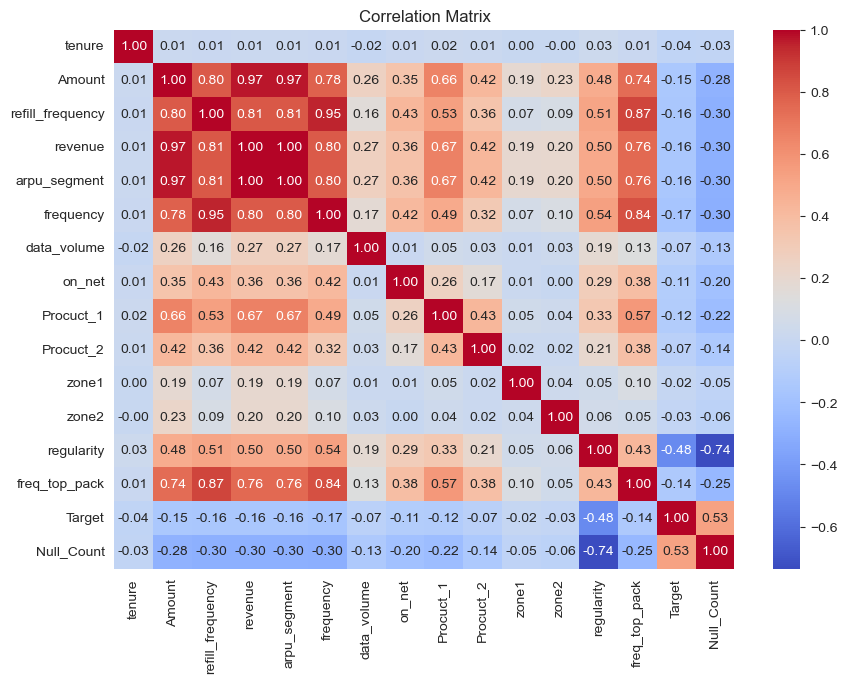

In [99]:
correlation_matrix = raw_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

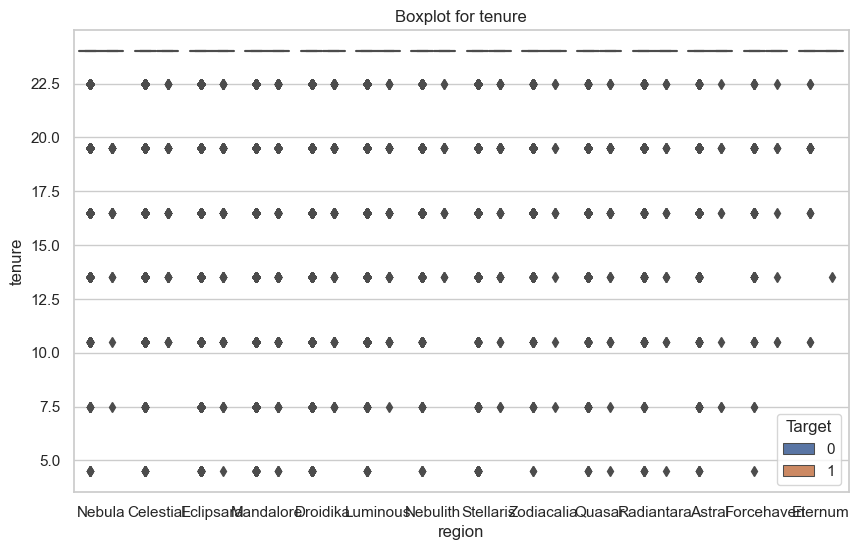

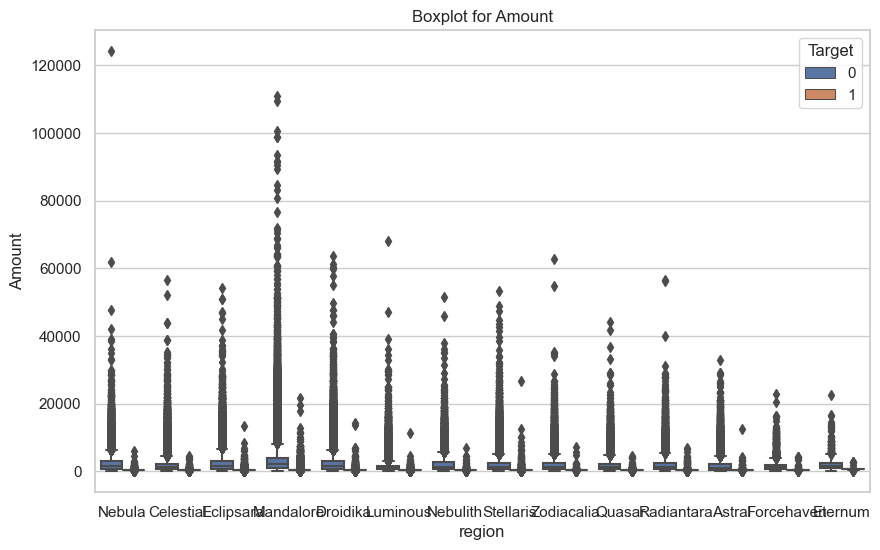

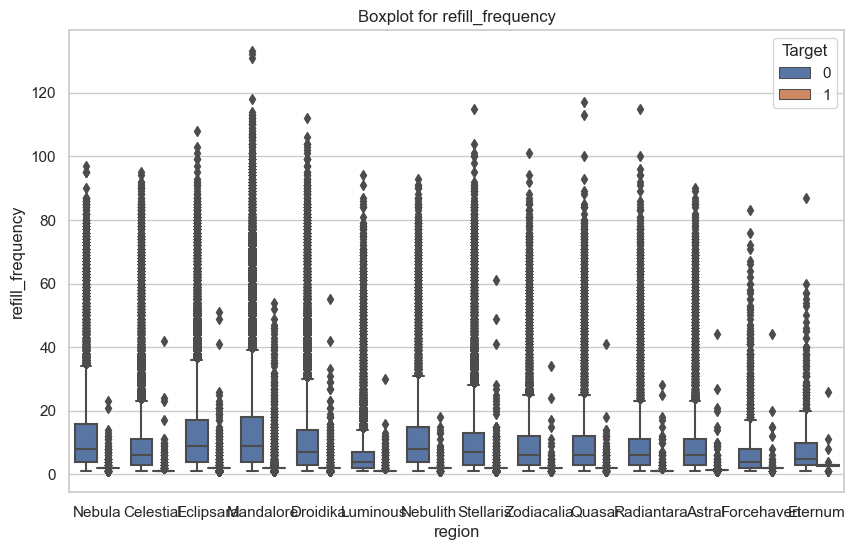

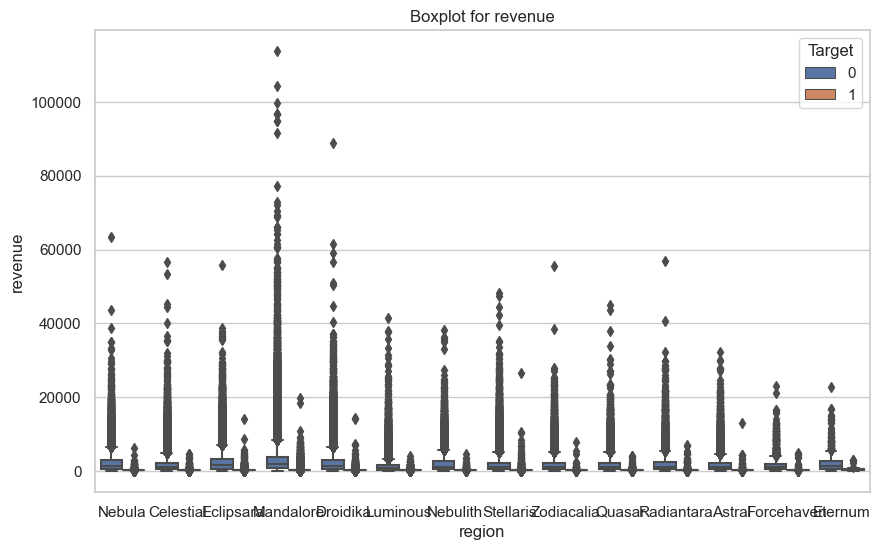

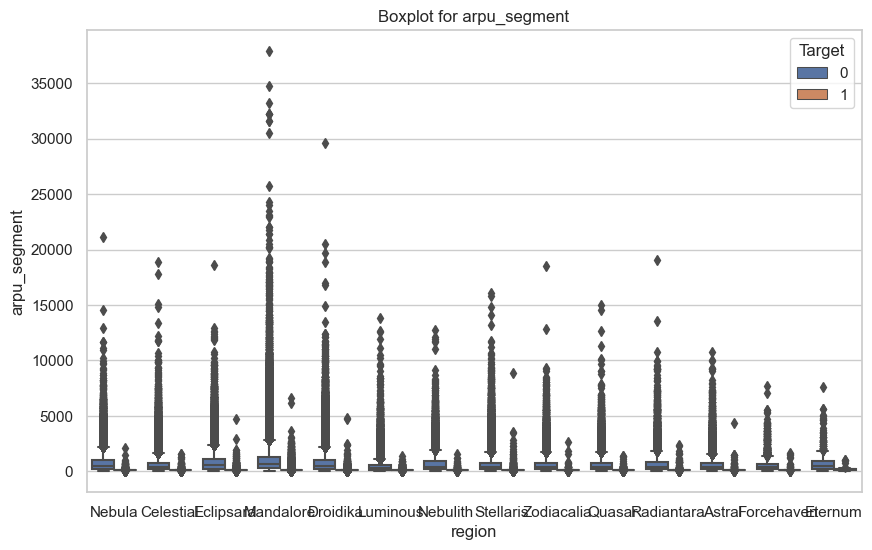

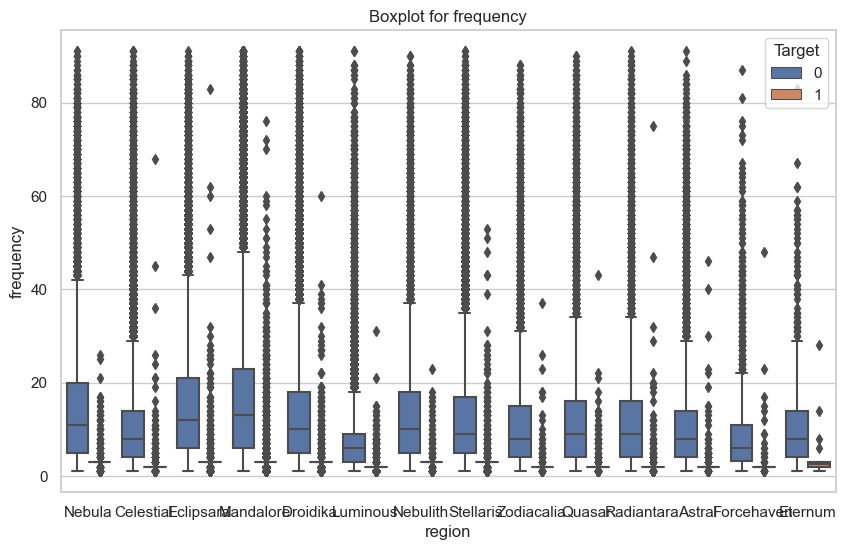

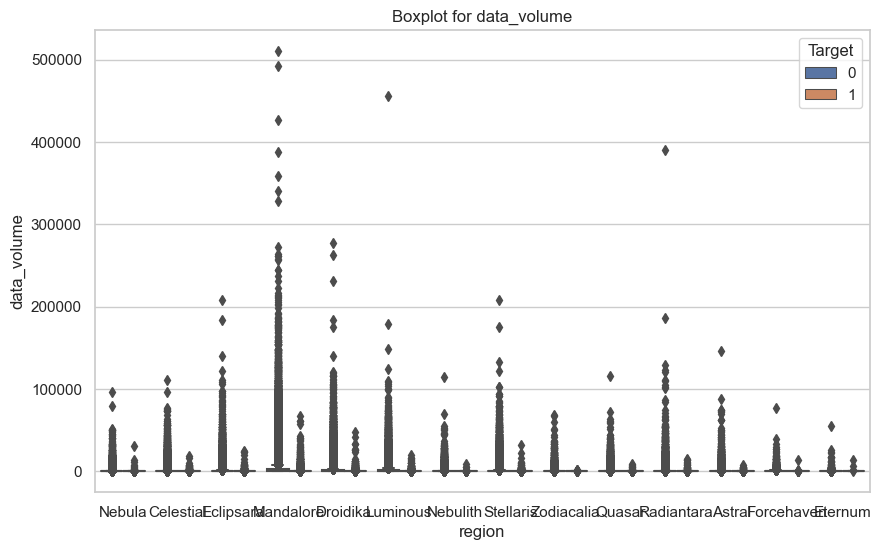

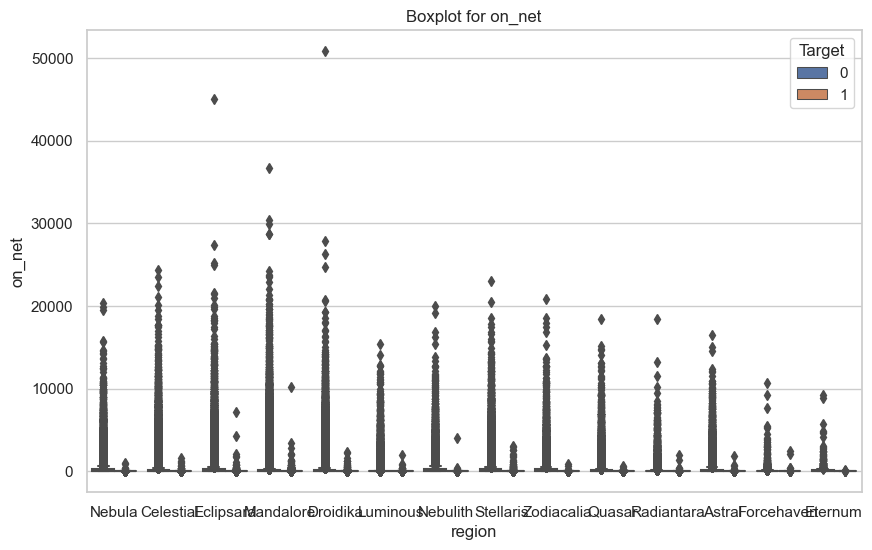

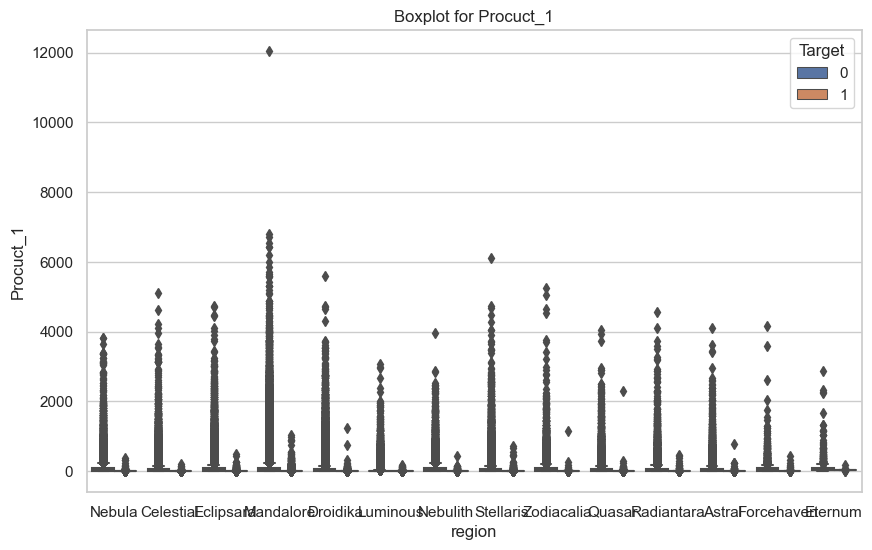

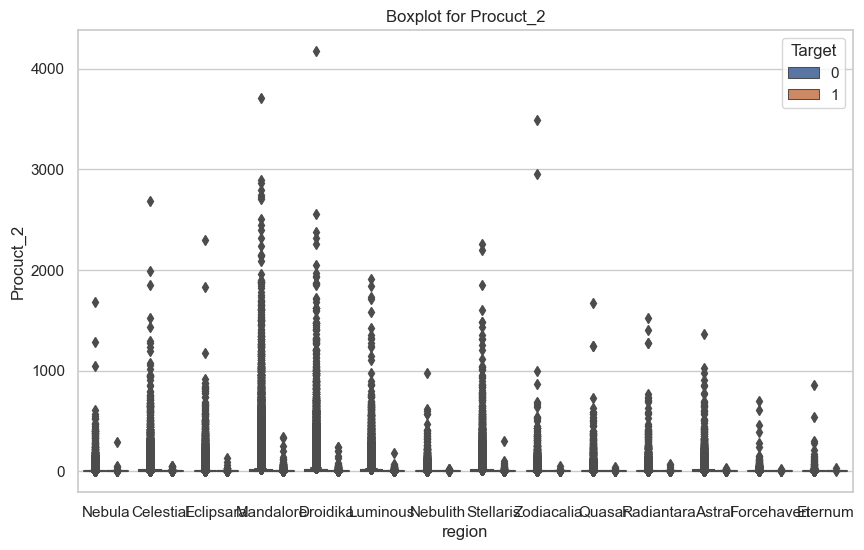

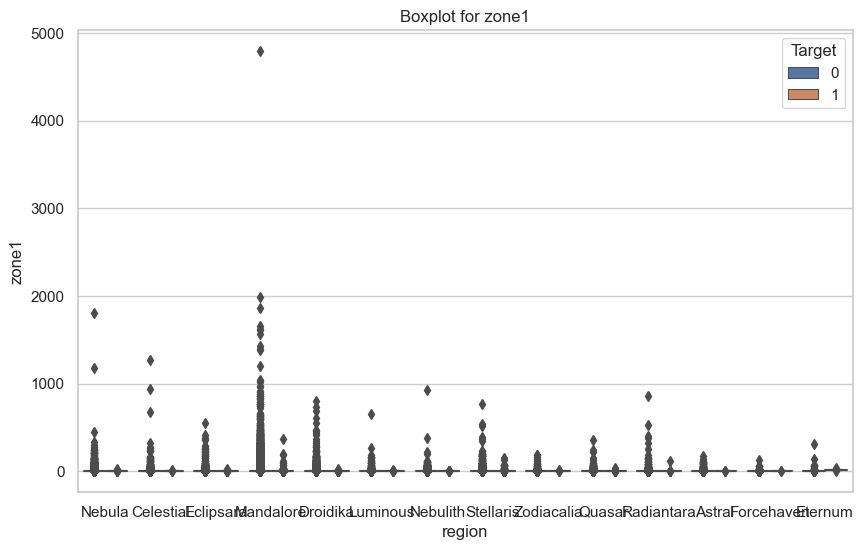

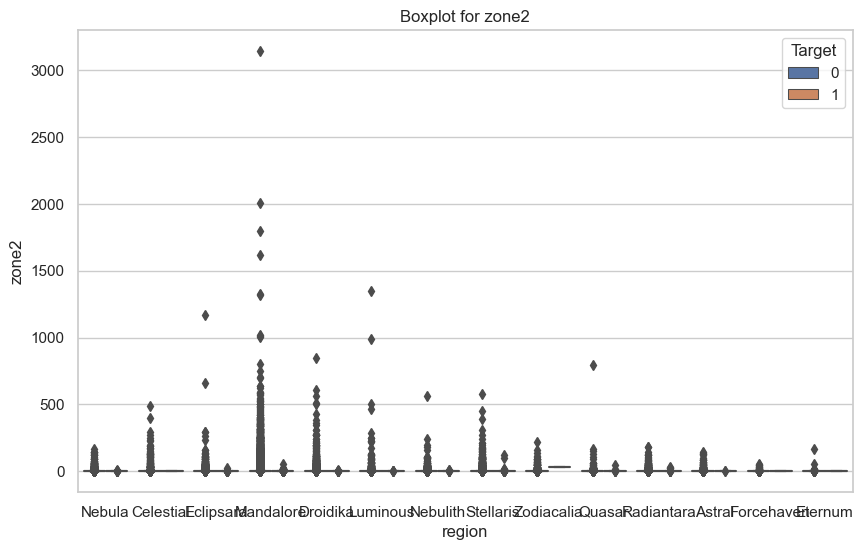

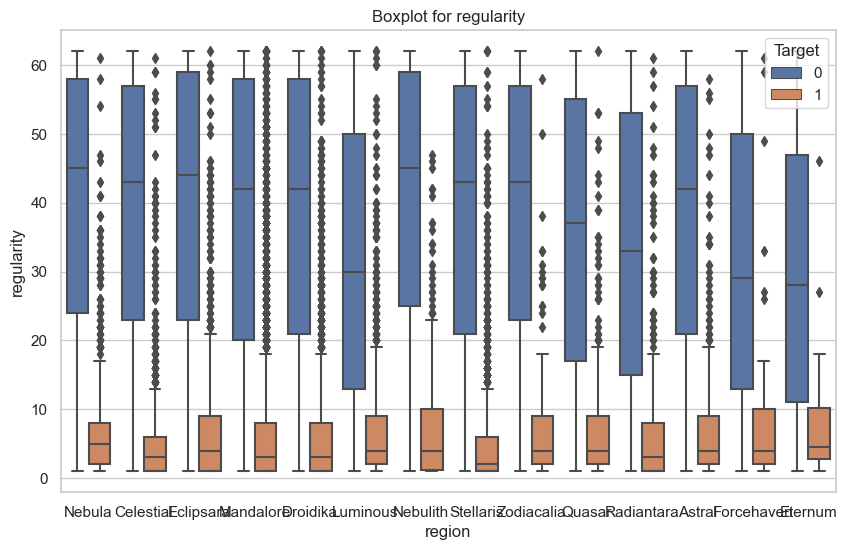

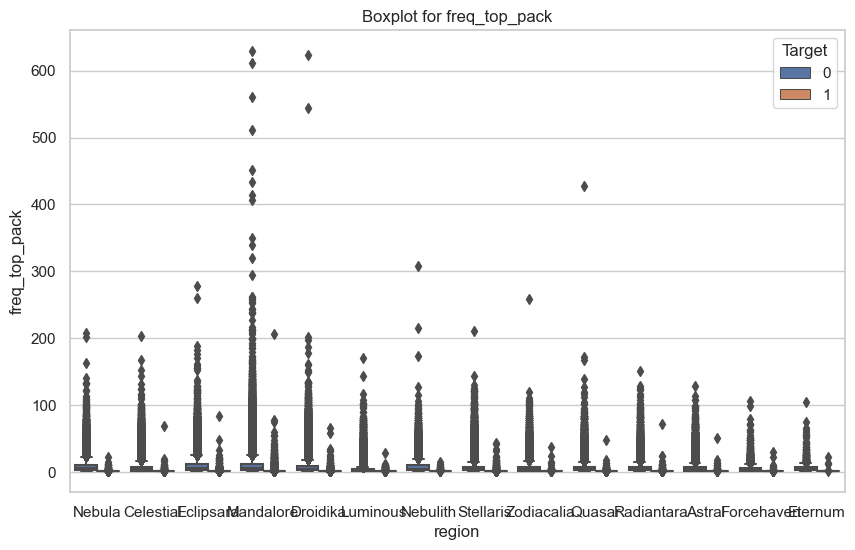

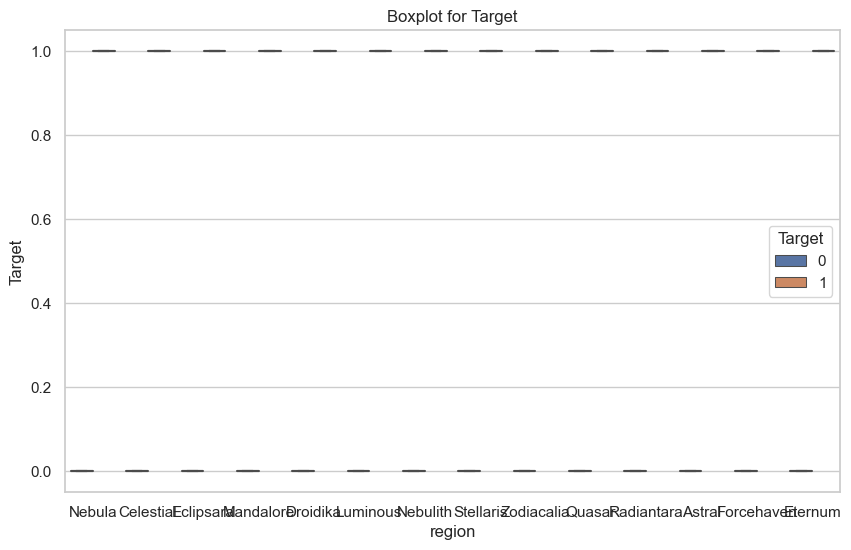

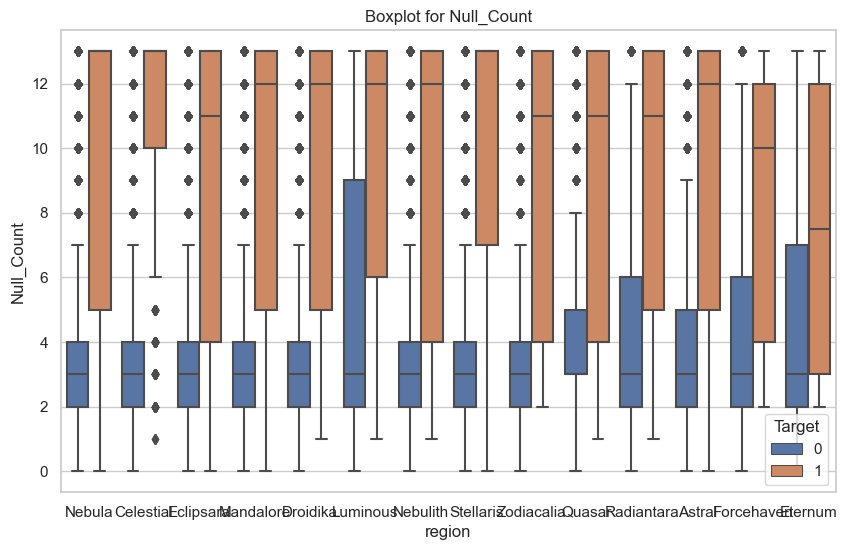

In [103]:
features_to_plot = raw_df.iloc[:,1:].columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.boxplot(x='region', y=feature, data=raw_df,hue='Target')
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [121]:
raw_df['region'] = raw_df['region'].fillna(raw_df['region'].mode().iloc[0])


In [122]:
raw_df.isnull().sum()

region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
regularity          0
freq_top_pack       0
Target              0
Null_Count          0
dtype: int64

In [180]:
raw_df.to_csv('train_clean_filled.csv')

In [181]:
raw_df = pd.read_csv('train_clean_filled.csv')
raw_df.set_index('ID',inplace=True)
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,3,5.0,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,6,5.0,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,Mandalore,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [184]:
features_to_calculate_percentile = raw_df.iloc[:,2:16].drop(columns='Target').columns
percentile_values_HIGHS = pd.DataFrame(raw_df.groupby('region')[features_to_calculate_percentile].quantile(0.99))
percentile_values_LOWS = pd.DataFrame(raw_df.groupby('region')[features_to_calculate_percentile].quantile(0.01))
def minmax_scaling(row):
    region = row['region']
    for feature in features_to_calculate_percentile:
        raw_value = row[feature]
        high_percentile = percentile_values_HIGHS.loc[region, feature]
        low_percentile = percentile_values_LOWS.loc[region, feature]
        scaled_value = (raw_value - low_percentile) / (high_percentile - low_percentile)
        row[feature] = scaled_value
    return row

# Apply min-max scaling to the entire DataFrame
scaled_df = raw_df.apply(minmax_scaling, axis=1)

scaled_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,Mandalore,24.0,0.105536,0.109091,0.102293,0.102264,0.131148,0.010073,0.011334,0.045655,0.051095,0.090909,0.083333,0.032787,0.083333,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,0.367450,0.655738,0.366003,0.365941,0.615385,0.000184,0.138493,0.027943,0.041667,0.050000,0.111111,1.000000,0.566038,0,3
ID_YZSU7B7M35QS,Celestial,24.0,0.523622,0.396226,0.521348,0.521344,0.355932,2.215608,0.000000,0.046854,0.006264,0.142857,1.000000,0.983607,0.063830,0,5
ID_QS4F5LEX29KM,Mandalore,24.0,0.105536,0.109091,0.102293,0.102264,0.131148,0.010073,0.011334,0.045655,0.051095,0.090909,0.083333,0.081967,0.083333,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,0.414716,0.904762,0.430906,0.430953,0.867647,0.060609,0.109212,0.472362,0.000000,0.166667,0.200000,1.000000,0.535714,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,Mandalore,24.0,0.577855,0.290909,0.549159,0.549110,0.278689,0.142863,0.003051,0.045655,0.080292,0.000000,5.083333,0.655738,0.062500,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,0.070866,0.018868,0.073956,0.073994,0.016949,0.179322,0.000000,0.046854,0.043851,0.142857,1.000000,0.573770,0.021277,0,4
ID_QWJPIJ065LA4,Luminous,24.0,0.207638,0.205128,0.232925,0.232943,0.200000,0.030004,0.014143,0.167421,0.226415,0.250000,1.000000,0.639344,0.264706,0,3


In [152]:
raw_df.groupby('region').max()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
region,,,,,,,,,,,,,,,,
Astral,24.0,33034.19,90.0,32286.32,10761.97,91.0,145658.0,16502.0,4094.0,1362.0,169.0,143.0,62,128.0,1,13
Celestial,24.0,56623.93,95.0,56698.29,18899.57,91.0,110463.0,24293.0,5108.0,2688.0,1274.0,485.0,62,203.0,1,13
Droidika,24.0,63653.85,112.0,88849.15,29616.24,91.0,277135.0,50809.0,5608.0,4174.0,803.0,849.0,62,624.0,1,13
Eclipsara,24.0,54059.83,108.0,55769.23,18589.74,91.0,208079.0,45011.0,4748.0,2295.0,554.0,1167.0,62,278.0,1,13
Eternum,24.0,22585.47,87.0,22702.14,7567.52,83.0,55139.0,9236.0,2864.0,857.0,314.0,165.0,62,105.0,1,13
Forcehaven,24.0,22735.04,83.0,23077.35,7692.31,87.0,77383.0,10620.0,4151.0,699.0,126.0,56.0,62,106.0,1,13
Luminous,24.0,67948.72,94.0,41536.32,13845.30,91.0,455659.0,15383.0,3064.0,1914.0,657.0,1346.0,62,170.0,1,13
Mandalore,24.0,113247.86,133.0,113696.58,37898.72,91.0,1823866.0,36687.0,12040.0,3706.0,4792.0,3143.0,62,629.0,1,14
Nebula,24.0,124145.30,97.0,63542.74,21180.77,91.0,96271.0,20295.0,3831.0,1683.0,1804.0,164.0,62,207.0,1,13


In [144]:
scaled_df.groupby('region').max()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
region,,,,,,,,,,,,,,,,
Astral,24.0,3.059524,1.745098,2.958954,2.958878,1.578947,12.345321,3.714458,6.062221,9.328767,33.800000,35.750000,1.0,2.886364,1,13
Celestial,24.0,5.208662,1.773585,5.157653,5.157637,1.525424,8.703199,4.692350,7.720327,16.838940,182.000000,485.000000,1.0,4.297872,1,13
Droidika,24.0,4.837397,1.947368,6.657159,6.656999,1.428571,11.435236,11.395321,7.077412,16.178295,100.375000,212.250000,1.0,11.980769,1,13
Eclipsara,24.0,4.227427,1.698413,4.287885,4.288032,1.323529,11.150797,9.003172,5.964824,20.309735,92.333333,233.400000,1.0,4.946429,1,13
Eternum,24.0,1.730726,1.747612,1.627572,1.627559,1.489014,3.382800,2.916951,2.377296,6.134574,9.515152,16.500000,1.0,1.959676,1,13
Forcehaven,24.0,2.032208,1.758148,2.001904,2.001852,1.612903,5.198528,4.217164,4.897588,9.800897,9.459459,8.860759,1.0,2.386364,1,13
Luminous,24.0,7.582341,2.384615,4.563341,4.563599,2.000000,17.305533,6.398918,6.932127,9.028302,164.250000,1346.000000,1.0,4.970588,1,13
Mandalore,24.0,9.166095,2.400000,8.960859,8.961095,1.475410,61.036260,15.992589,17.731959,27.051095,435.636364,261.916667,1.0,13.083333,1,14
Nebula,24.0,9.741613,1.573770,4.923109,4.923118,1.384615,8.851301,4.489965,4.460460,23.375000,90.200000,18.222222,1.0,3.886792,1,13


In [153]:
raw_df.groupby('region').min()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
region,,,,,,,,,,,,,,,,
Astral,4.5,12.82,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Celestial,4.5,21.37,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Droidika,4.5,21.37,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Eclipsara,4.5,21.37,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Eternum,10.5,42.74,1.0,0.85,0.43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Forcehaven,4.5,42.74,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Luminous,4.5,21.37,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Mandalore,4.5,4.27,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0
Nebula,4.5,17.09,1.0,0.43,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0


In [154]:
scaled_df.groupby('region').min()

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
region,,,,,,,,,,,,,,,,
Astral,4.5,-0.006746,0.0,-0.002980,-0.003058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Celestial,4.5,-0.005905,0.0,-0.003813,-0.003851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Droidika,4.5,-0.004878,0.0,-0.002274,-0.002307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Eclipsara,4.5,-0.001672,0.0,-0.002729,-0.002763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Eternum,10.5,-0.006587,0.0,-0.001193,-0.001162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Forcehaven,4.5,-0.003834,0.0,-0.002491,-0.002566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Luminous,4.5,-0.004773,0.0,-0.001878,-0.001972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Mandalore,4.5,-0.003115,0.0,-0.000337,-0.000404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Nebula,4.5,-0.005369,0.0,-0.002716,-0.002784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [155]:
raw_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Target,Null_Count
ID,,,,,,,,,,,,,,,,,
ID_YEB05X4KUGPQ,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,3,5.0,0,14
ID_Z9IQ9QH52KVN,Nebula,24.0,4764.96,41.0,4756.84,1585.47,41.0,2.0,626.0,24.0,3.0,1.0,1.0,62,31.0,0,3
ID_YZSU7B7M35QS,Celestial,24.0,5769.23,22.0,5769.23,1923.08,22.0,28121.0,0.0,31.0,1.0,1.0,1.0,61,4.0,0,5
ID_QS4F5LEX29KM,Mandalore,24.0,1346.15,7.0,1302.56,434.19,9.0,301.0,26.0,31.0,7.0,1.0,1.0,6,5.0,0,14
ID_8IYIC9PFU8U1,Eclipsara,24.0,5341.88,58.0,5636.75,1879.06,60.0,1131.0,546.0,376.0,0.0,1.0,1.0,62,31.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_D1MA2025F1U6,Mandalore,24.0,7179.49,17.0,6972.22,2323.93,18.0,4269.0,7.0,31.0,11.0,0.0,61.0,41,4.0,0,2
ID_9H6BGU1FS1CD,Celestial,24.0,854.70,2.0,854.70,285.04,2.0,2276.0,0.0,31.0,7.0,1.0,1.0,36,2.0,0,4
ID_QWJPIJ065LA4,Luminous,24.0,1923.08,9.0,2136.75,712.39,10.0,790.0,34.0,74.0,48.0,1.0,1.0,40,10.0,0,3


In [185]:
features = pd.get_dummies(scaled_df.drop(columns=['Target','Amount','revenue','refill_frequency']))
targets = scaled_df['Target']

In [186]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(features, targets)
print(targets.value_counts())
print(y_resampled.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=0)

0    1225319
1     282515
Name: Target, dtype: int64
0    1225319
1    1225319
Name: Target, dtype: int64


In [193]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled  = rus.fit_resample(features,targets)
print(y_resampled.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=0)

0    282515
1    282515
Name: Target, dtype: int64


In [194]:
X_train.columns

Index(['tenure', 'arpu_segment', 'frequency', 'data_volume', 'on_net',
       'Procuct_1', 'Procuct_2', 'zone1', 'zone2', 'regularity',
       'freq_top_pack', 'Null_Count', 'region_Astral', 'region_Celestial',
       'region_Droidika', 'region_Eclipsara', 'region_Eternum',
       'region_Forcehaven', 'region_Luminous', 'region_Mandalore',
       'region_Nebula', 'region_Nebulith', 'region_Quasar',
       'region_Radiantara', 'region_Stellaris', 'region_Zodiacalia'],
      dtype='object')

In [158]:
model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state=0)
model_rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, random_state=0)

In [195]:
model_xgb = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_dephth = 5,
    n_estimators = 200,
    objective='binary:logistic',  
    eval_metric='logloss',        
    random_state=0
)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_dephth=5,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None, ...)

In [160]:
scoring = {'accuracy': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score)}

# Initialize cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate Random Forest
rf_accuracy = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='accuracy')
rf_f1_score = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='f1')

print("Random Forest Cross-Validation Results:")
print("Accuracy:", rf_accuracy.mean())
print("F1 Score:", rf_f1_score.mean())
print()

Random Forest Cross-Validation Results:
Accuracy: 0.915316422767545
F1 Score: 0.9194891739407988



Accuracy: 0.9173603630072145
Confusion Matrix:
[[212442  32736]
 [  7768 237182]]
___________________________
F1 Score: 0.9213312926808426
Feature ranking:
regularity: 0.23998043731867277
Null_Count: 0.16825160777401074
frequency: 0.09258028966562418
Procuct_1: 0.08314604154779699
arpu_segment: 0.07566794207440705
freq_top_pack: 0.0679059743432307
region_Mandalore: 0.0662268993665469
on_net: 0.060461404916287084
data_volume: 0.04519713468156035
zone2: 0.0433631168881641
Procuct_2: 0.033252348435950776
zone1: 0.007526442206125732
region_Droidika: 0.004681099339919714
tenure: 0.003052961297409637
region_Celestial: 0.002251776321304162
region_Luminous: 0.0020874135197679338
region_Eclipsara: 0.0014865988214345007
region_Stellaris: 0.0011631063929009313
region_Quasar: 0.0005407395715806771
region_Nebula: 0.0003498200920245457
region_Radiantara: 0.0002447639762105417
region_Zodiacalia: 0.0002390339897078934
region_Astral: 0.00014395413608061247
region_Nebulith: 0.0001100298407852885
region_

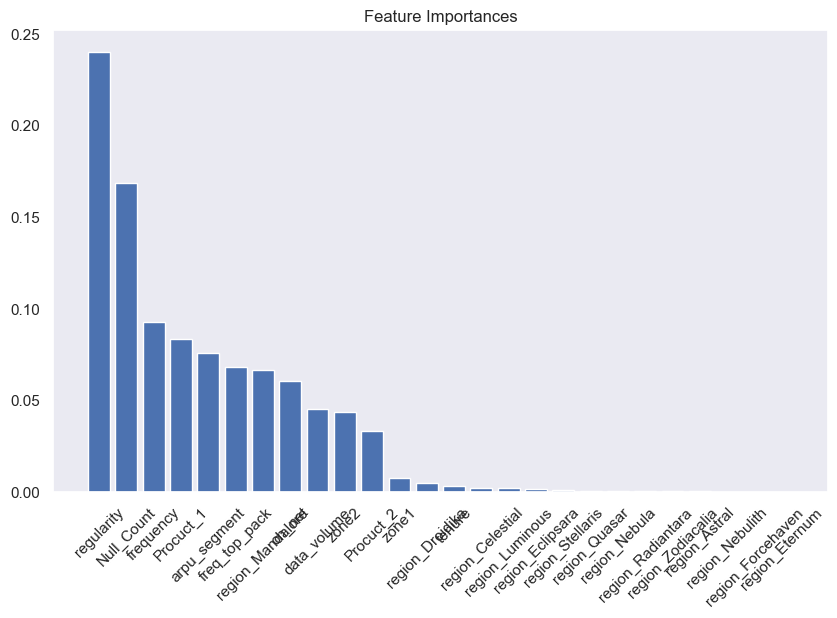

In [162]:
y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Access feature importances
importances = model_rf.feature_importances_

# Get the indices that would sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Optionally, plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()


In [163]:
xgb_accuracy = cross_val_score(model_xgb, X_train, y_train, cv=cv, scoring='accuracy')
xgb_f1_score = cross_val_score(model_xgb, X_train, y_train, cv=cv, scoring='f1')

print("XGBoost Cross-Validation Results:")
print("Accuracy:", xgb_accuracy.mean())
print("F1 Score:", xgb_f1_score.mean())

XGBoost Cross-Validation Results:
Accuracy: 0.9110007089991891
F1 Score: 0.9158601529181837


Accuracy: 0.8908907491637612
Confusion Matrix:
[[46454  9849]
 [ 2481 54222]]
___________________________
F1 Score: 0.8979084902379652
Feature ranking:
zone2: 0.6103207468986511
regularity: 0.11643845587968826
Procuct_2: 0.03519635275006294
region_Droidika: 0.028600025922060013
region_Mandalore: 0.02427932247519493
Null_Count: 0.023296093568205833
region_Zodiacalia: 0.01955306902527809
region_Eclipsara: 0.01815551333129406
region_Forcehaven: 0.014966883696615696
zone1: 0.012157591991126537
region_Nebula: 0.011404824443161488
region_Quasar: 0.010657724924385548
region_Radiantara: 0.009286494925618172
freq_top_pack: 0.008492566645145416
data_volume: 0.008179393596947193
region_Nebulith: 0.0075650205835700035
Procuct_1: 0.007057566661387682
region_Stellaris: 0.006705443374812603
region_Luminous: 0.006562991067767143
arpu_segment: 0.005286382511258125
region_Celestial: 0.00466684065759182
on_net: 0.003469626884907484
frequency: 0.003060618182644248
tenure: 0.0020372557919472456
region_Astr

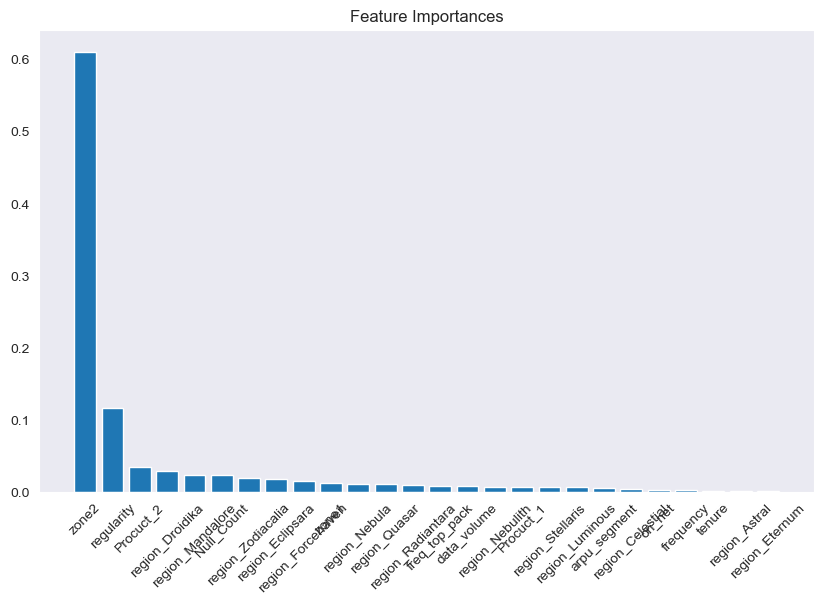

In [196]:
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('___________________________')
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [81]:
y_test.shape

(490128,)

In [82]:
y_test.value_counts()

0    245178
1    244950
Name: Target, dtype: int64

In [197]:
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
print("XGBoost Metrics:")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {auc_roc_xgb:.4f}\n")
print('________________________________________________________')

XGBoost Metrics:
Precision: 0.8463
Recall: 0.9562
F1 Score: 0.8979
AUC-ROC: 0.9469

________________________________________________________


In [161]:
test_data

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Null_Count
0,ID_LZ8K373W7EWV,Droidika,K > 24 month,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,11.0,2
1,ID_04KNWHGV5783,Luminous,K > 24 month,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,NO,49,All-net 500F=2000F;5d,12.0,3
2,ID_CXS07G6VLB2U,Astral,K > 24 month,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,NO,13,Jokko_Daily,6.0,2
3,ID_N3NFJJVHS25K,Eclipsara,K > 24 month,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,NO,53,All-net 500F=2000F;5d,13.0,3
4,ID_R36J4ROT93E9,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,ID_MGZSA4ICBD9O,Stellaris,K > 24 month,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,NaN,NaN,NO,54,All-net 500F=2000F;5d,20.0,3
380123,ID_XGDT520DFBLP,NaN,K > 24 month,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,NO,59,"Data: 200 F=100MB,24H",33.0,3
380124,ID_9RDB792PB5Q4,Mandalore,K > 24 month,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NO,43,NaN,NaN,7
380125,ID_KDTJHH8L8Z13,Luminous,K > 24 month,2307.69,9.0,2264.53,754.70,13.0,7381.0,15.0,NaN,19.0,2.0,NaN,NO,61,"Data:490F=1GB,7d",5.0,2


In [162]:
test_data.set_index('ID',inplace=True)
test_data['tenure'] = test_data['tenure'].map(tenuremap)
test_data.drop(columns=['mrg','top_pack'],inplace=True)
test_data

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Null_Count
ID,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,59,11.0,2
ID_04KNWHGV5783,Luminous,24.0,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,49,12.0,3
ID_CXS07G6VLB2U,Astral,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,13,6.0,2
ID_N3NFJJVHS25K,Eclipsara,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,53,13.0,3
ID_R36J4ROT93E9,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,24.0,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,NaN,NaN,54,20.0,3
ID_XGDT520DFBLP,NaN,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,59,33.0,3
ID_9RDB792PB5Q4,Mandalore,24.0,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,NaN,NaN,43,NaN,7


In [163]:
test_df = test_data.copy()
test_df

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Null_Count
ID,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,NaN,NaN,59,11.0,2
ID_04KNWHGV5783,Luminous,24.0,2991.45,14.0,2991.45,997.01,17.0,NaN,99.0,100.0,84.0,NaN,NaN,49,12.0,3
ID_CXS07G6VLB2U,Astral,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,NaN,NaN,13,6.0,2
ID_N3NFJJVHS25K,Eclipsara,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,NaN,NaN,NaN,53,13.0,3
ID_R36J4ROT93E9,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,24.0,4273.50,19.0,4487.18,1495.73,20.0,NaN,60.0,208.0,80.0,NaN,NaN,54,20.0,3
ID_XGDT520DFBLP,NaN,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,59,33.0,3
ID_9RDB792PB5Q4,Mandalore,24.0,NaN,NaN,42.31,14.10,1.0,0.0,1.0,1.0,NaN,NaN,NaN,43,NaN,7


In [164]:
region_med_0 = test_df.groupby('region').transform('median')
mask = test_df['region'].notnull()
test_df.loc[mask] = test_df.loc[mask].fillna(region_med_0)
test_df


,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Null_Count
ID,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,24.0,2008.55,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,1.0,1.0,59,11.0,2
ID_04KNWHGV5783,Luminous,24.0,2991.45,14.0,2991.45,997.01,17.0,807.5,99.0,100.0,84.0,1.0,1.0,49,12.0,3
ID_CXS07G6VLB2U,Astral,24.0,1581.20,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,1.0,1.0,13,6.0,2
ID_N3NFJJVHS25K,Eclipsara,24.0,2564.10,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,4.0,1.0,1.0,53,13.0,3
ID_R36J4ROT93E9,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,24.0,4273.50,19.0,4487.18,1495.73,20.0,60.0,60.0,208.0,80.0,1.0,1.0,54,20.0,3
ID_XGDT520DFBLP,NaN,24.0,6901.71,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,NaN,NaN,59,33.0,3
ID_9RDB792PB5Q4,Mandalore,24.0,2008.55,9.0,42.31,14.10,1.0,0.0,1.0,1.0,7.0,1.0,2.0,43,6.0,7


In [165]:
test_df[test_df['frequency'].notnull()]= test_df[test_df['frequency'].notnull()].fillna(test_df.groupby('frequency').median())
test_df[test_df['data_volume'].notnull()]= test_df[test_df['data_volume'].notnull()].fillna(test_df.groupby('frequency').median())
test_df[test_df['Procuct_1'].notnull()]= test_df[test_df['Procuct_1'].notnull()].fillna(test_df.groupby('frequency').median())
test_df[test_df['on_net'].notnull()]= test_df[test_df['on_net'].notnull()].fillna(test_df.groupby('frequency').median())
test_df[test_df['freq_top_pack'].notnull()]= test_df[test_df['freq_top_pack'].notnull()].fillna(test_df.groupby('frequency').median())

for tenure in test_df.tenure.unique():
    condition_0 = test_df.tenure == tenure
    
    if not test_df[condition_0].empty:
        test_df.loc[condition_0] = test_df.loc[condition_0].fillna(test_df.groupby('regularity').median())
    
    print(f'Tenure = {tenure}')

test_df = test_df.fillna(test_df.median())


Tenure = 24.0
Tenure = 19.5
Tenure = 16.5
Tenure = 13.5
Tenure = 22.5
Tenure = 7.5
Tenure = 10.5
Tenure = 4.5


In [172]:
test_df['region'] = test_df['region'].fillna(test_df['region'].mode().iloc[0])

In [173]:
test_df.isnull().sum()

region              0
tenure              0
Amount              0
refill_frequency    0
revenue             0
arpu_segment        0
frequency           0
data_volume         0
on_net              0
Procuct_1           0
Procuct_2           0
zone1               0
zone2               0
regularity          0
freq_top_pack       0
Null_Count          0
dtype: int64

In [174]:
test_df.iloc[:,2:15]

,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack
ID,,,,,,,,,,,,,
ID_LZ8K373W7EWV,2008.550,16.0,2010.26,670.09,17.0,10.0,247.0,17.0,70.0,1.0,1.0,59,11.0
ID_04KNWHGV5783,2991.450,14.0,2991.45,997.01,17.0,807.5,99.0,100.0,84.0,1.0,1.0,49,12.0
ID_CXS07G6VLB2U,1581.200,8.0,1578.21,526.07,8.0,436.0,47.0,113.0,5.0,1.0,1.0,13,6.0
ID_N3NFJJVHS25K,2564.100,12.0,2777.78,926.07,13.0,0.0,135.0,181.0,4.0,1.0,1.0,53,13.0
ID_R36J4ROT93E9,1391.025,7.0,1343.16,447.86,9.0,309.0,26.0,31.0,7.0,1.0,1.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,4273.500,19.0,4487.18,1495.73,20.0,60.0,60.0,208.0,80.0,1.0,1.0,54,20.0
ID_XGDT520DFBLP,6901.710,41.0,7115.38,2371.79,41.0,7019.0,105.0,257.0,5.0,1.0,1.0,59,33.0
ID_9RDB792PB5Q4,2008.550,9.0,42.31,14.10,1.0,0.0,1.0,1.0,7.0,1.0,2.0,43,6.0


In [201]:
test_df.to_csv('test_clean_filled.csv')

In [175]:
features_to_calculate_percentile = test_df.iloc[:,2:15].columns
percentile_values_HIGHS = pd.DataFrame(test_df.groupby('region')[features_to_calculate_percentile].quantile(0.99))
percentile_values_LOWS = pd.DataFrame(test_df.groupby('region')[features_to_calculate_percentile].quantile(0.01))
def minmax_scaling(row):
    region = row['region']
    for feature in features_to_calculate_percentile:
        raw_value = row[feature]
        high_percentile = percentile_values_HIGHS.loc[region, feature]
        low_percentile = percentile_values_LOWS.loc[region, feature]
        scaled_value = (raw_value - low_percentile) / (high_percentile - low_percentile)
        row[feature] = scaled_value
    return row

# Apply min-max scaling to the entire DataFrame
test_scaled = test_df.apply(minmax_scaling, axis=1)

test_scaled

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,regularity,freq_top_pack,Null_Count
ID,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,Droidika,24.0,0.146920,0.263158,0.148966,0.148970,0.253968,0.000424,0.056267,0.022470,0.288066,0.125000,0.250000,0.950820,0.193874,2
ID_04KNWHGV5783,Luminous,24.0,0.311926,0.317073,0.315480,0.315463,0.333333,0.031814,0.036295,0.210850,0.371386,0.333333,1.000000,0.786885,0.297297,3
ID_CXS07G6VLB2U,Astral,24.0,0.139757,0.141672,0.140622,0.140642,0.127273,0.035269,0.010532,0.189394,0.035110,0.142857,0.250000,0.196721,0.115181,2
ID_N3NFJJVHS25K,Eclipsara,24.0,0.200680,0.174603,0.212538,0.212551,0.179104,0.000000,0.027685,0.238472,0.033058,0.200000,0.166667,0.852459,0.214286,3
ID_R36J4ROT93E9,Mandalore,24.0,0.107626,0.109091,0.105493,0.105496,0.131148,0.010196,0.011209,0.045655,0.051852,0.090909,0.090909,0.000000,0.083333,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,Stellaris,24.0,0.365460,0.321429,0.387063,0.387080,0.306452,0.003031,0.012405,0.279829,0.451977,0.142857,0.250000,0.868852,0.387755,3
ID_XGDT520DFBLP,Mandalore,24.0,0.554593,0.727273,0.560443,0.560427,0.655738,0.231614,0.045267,0.378498,0.037037,0.090909,0.090909,0.950820,0.666667,3
ID_9RDB792PB5Q4,Mandalore,24.0,0.157713,0.145455,0.002964,0.002930,0.000000,0.000000,0.000431,0.001473,0.051852,0.090909,0.181818,0.688525,0.104167,7


In [176]:
test_scaled = pd.get_dummies(test_scaled)
test_scaled

,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,...,region_Eternum,region_Forcehaven,region_Luminous,region_Mandalore,region_Nebula,region_Nebulith,region_Quasar,region_Radiantara,region_Stellaris,region_Zodiacalia
ID,,,,,,,,,,,,,,,,,,,,,
ID_LZ8K373W7EWV,24.0,0.146920,0.263158,0.148966,0.148970,0.253968,0.000424,0.056267,0.022470,0.288066,...,0,0,0,0,0,0,0,0,0,0
ID_04KNWHGV5783,24.0,0.311926,0.317073,0.315480,0.315463,0.333333,0.031814,0.036295,0.210850,0.371386,...,0,0,1,0,0,0,0,0,0,0
ID_CXS07G6VLB2U,24.0,0.139757,0.141672,0.140622,0.140642,0.127273,0.035269,0.010532,0.189394,0.035110,...,0,0,0,0,0,0,0,0,0,0
ID_N3NFJJVHS25K,24.0,0.200680,0.174603,0.212538,0.212551,0.179104,0.000000,0.027685,0.238472,0.033058,...,0,0,0,0,0,0,0,0,0,0
ID_R36J4ROT93E9,24.0,0.107626,0.109091,0.105493,0.105496,0.131148,0.010196,0.011209,0.045655,0.051852,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_MGZSA4ICBD9O,24.0,0.365460,0.321429,0.387063,0.387080,0.306452,0.003031,0.012405,0.279829,0.451977,...,0,0,0,0,0,0,0,0,1,0
ID_XGDT520DFBLP,24.0,0.554593,0.727273,0.560443,0.560427,0.655738,0.231614,0.045267,0.378498,0.037037,...,0,0,0,1,0,0,0,0,0,0
ID_9RDB792PB5Q4,24.0,0.157713,0.145455,0.002964,0.002930,0.000000,0.000000,0.000431,0.001473,0.051852,...,0,0,0,1,0,0,0,0,0,0


In [177]:
test_scaled.drop(columns=['Amount','refill_frequency','revenue'],inplace=True)

In [178]:
test_scaled.isnull().sum()

tenure               0
arpu_segment         0
frequency            0
data_volume          0
on_net               0
Procuct_1            0
Procuct_2            0
zone1                0
zone2                0
regularity           0
freq_top_pack        0
Null_Count           0
region_Astral        0
region_Celestial     0
region_Droidika      0
region_Eclipsara     0
region_Eternum       0
region_Forcehaven    0
region_Luminous      0
region_Mandalore     0
region_Nebula        0
region_Nebulith      0
region_Quasar        0
region_Radiantara    0
region_Stellaris     0
region_Zodiacalia    0
dtype: int64

In [198]:
final_pred = model_xgb.predict(test_scaled)
final_pred
data = list(zip(test_df.index, final_pred))

result_df = pd.DataFrame(data, columns=['ID', 'Predictions'])
print(result_df)
result_df.to_csv('Submission3.1.4.csv',index=False)

                     ID  Predictions
0       ID_LZ8K373W7EWV            0
1       ID_04KNWHGV5783            0
2       ID_CXS07G6VLB2U            0
3       ID_N3NFJJVHS25K            0
4       ID_R36J4ROT93E9            0
...                 ...          ...
380122  ID_MGZSA4ICBD9O            0
380123  ID_XGDT520DFBLP            0
380124  ID_9RDB792PB5Q4            0
380125  ID_KDTJHH8L8Z13            0
380126  ID_2F6Y446GS8T3            0

[380127 rows x 2 columns]


In [199]:
result_df['Predictions'].value_counts()

0    370504
1      9623
Name: Predictions, dtype: int64